In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

In [3]:
data = pd.read_excel("dataset.xlsx")

In [4]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

# 1. Exploratory Data Analysis
## Objectif:
 - Comprendre du mieux possible nos données ( un petit pas en avant vaux mieux qu'un grand pas en arrière )
 - Développer une premier stratégie de modélisation

## Checklist de base 
### Analyse de Forme :
    . variable target: SARS-Cov-2 exam result
    . lignes et colones : (5644, 111)
    . types de variables : qualitatives : 70 , quantitatives : 41 
    . Analyse des valeurs manquantes :
        . beaucoup de NaN ( moitié des variables > 90 % )
        . 2 groupes de données 76% -> Test viral ( ce qui vas par la suite être nome le groupe Viral ), 89% -> taux sanguins ( ce qui par le suite seras norme le groupe BLOOD)
### Analyse de Fond : 
    . Visualisation de la target : 
        .10% cas positifs et 90% des cas negatives 
    . Signification des variables :
        - variables continues standardisées , skewed(asymétrique), test sanguin
        - age quantile : difficile d'interpreter ce graphique, clairement ces données ont été traitées , on pourrait penser 0-5 , mais cela pourrait aussi être une transformation mathématique . On peut pas savoir car la personne qui a mit ce dataset ne le précise nul part. Mais cas n'est pas tres important
        - variable qualitative : binaire (0,1), viral, Rhinovirus qui semble tres élevée
    . Relation Variables/Target : 
        - target/blood: les taux de Monocytes, Platelets, Leukocytes semblent liés aux Covid-19 -> hypothèse a tester
        - target/age : les individus da faible age sont tres peux contaminés ? -> attention on ne connaît pas l'age , et on ne sait pas de quant date le dataset ( s'il s'agit des enfants on sait que les enfants sont touchés autant que les adultes ). En revanche cette variable pourra être intéressante pour le comparer avec les résultats de tests sanguins.
        - target / viral : les doubles maladies sont tres rares . Rhinovirus / Enterovirus positif - Covid-19 négatif ? -> hypothèse a tester ? mais il est possible que la région est subie une épidémie de ce virus . De plus on peut tres bien avoir 2 virus en meme temps . Tout ca n'a aucun lien avec le Covid-19  











### Conclusion initiales 
. Beaucoup de données manquantes ( aux mieux on garde 20% du dataset )
. 2 groupes de données intéressantes ( viral, sanguin )
.Presque pas de variable " discriminante" pour distinguer les cas positifs/négatifs, ce qui nous permet de dire qu'il n'est pas vraiment approprié de vouloir prédire si une individu est atteint du Covid-19 en se basant sur ces simples tests sanguins. mais c'est pas grave, il faut meme poursuivre l'analyse pour essayer de voir ce qu'on peut apprendre. Rome ne s'est pas faites en un jour, et le ML ca ne peut pas transformer l'eaux en vin. Mais ca n'est pas une raison pour abandonner le projet. Et ca , c'est la chose la plus importante que vous devez retenir de cette vidéo : Un bon data scientist il vas jusqu'au bout de sa mission. Si en cours de route , on se rend compte que l'histoire n'est pas aussi simple qu'on pouvait l'espérer , alors il faut pourvoir le démontrer de façon robuste en allant jusqu'au bout des choses 
. Donc maintenant quand meme quelque chose de positif : on a put identifier des variables intéressantes qui sont susceptibles de jouer un role non négligeable (monocytes ect )          
 

## Analyse plus détaillée 

### . Relation Variables / Variables:
- blood_data / blood_data : certaines variables sont tres corrélées : +0.9 ( a surveiller plus tard)
- blood_data / age : tres faible corrélation entre age et taux sanguins 
- viral / viral: influenza rapid test donne de mauvaise résultats , il faudra peut-être la laisser tomber
- relation maladie / blood data : les taux sanguins entre malades et Covid-19 sont différents
- relation hospitalisation / est malade :
- relation hospitalisation / blood :intéressant dans le cas ou on voudrait prédire dans quelle service un patient devrait aller  

### . NaN analyse :
- viral : 1350(92/8), blood : 600(87/13), both : 90

### hypotheses nulle (H0):
 . les individus atteints du Covid-19 ont des taux de Leukocytes , Monocytes , Platelets significativement différents
    - H0 = les taux moyens sont ÉGAUX chez les individus positifs et négatifs ( on vas utiliser le test de student qui permet de voire si la moyenne entre deux distribution est significativement différente  )
 . Les individus atteints d'une quelconque maladie ont des taux significativement différents 

In [5]:
df =  data.copy()

In [6]:
df.shape

(5644, 111)

In [7]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [8]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: ylabel='count'>

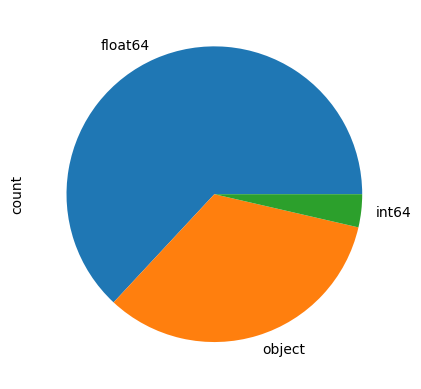

In [9]:
df.dtypes.value_counts().plot.pie()

In [10]:
df.isna()

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
...          ...                   ...                     ...   
5639       False                 False                   False   
5640       False                 False                   False   
5641       False                 False                   False   
5642       False                 False                   False   
5643       False                 False                   False   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
5639                                           False   
5640                                           False   
5641                                           False   
5642                                           False   
5643                                           False   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...                                                 ...       
5639                                              False       
5640                                              False       
5641                                              False       
5642                                              False       
5643                                              False       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                 False            True   
1                                                 False           False   
2                                                 False            True   
3                                                 False            True   
4                                                 False            True   
...                                                 ...             ...   
5639                                              False            True   
5640                                              False            True   
5641                                              False            True   
5642                                              False            True   
5643                                              False           False   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0           True       True                   True             True   
1          False      False                  False            False   
2           True       True                   True             True   
3           True       True                   True             True   
4           True       True                   True             True   
...          ...        ...                    ...              ...   
5639        True       True                   True             True   
5640        True       True                   True             True   
5641        True       True                   True             True   
5642        True       True                   True             True   
5643       False      False                  False            False   

      Lymphocytes  Mean corpu

<Axes: >

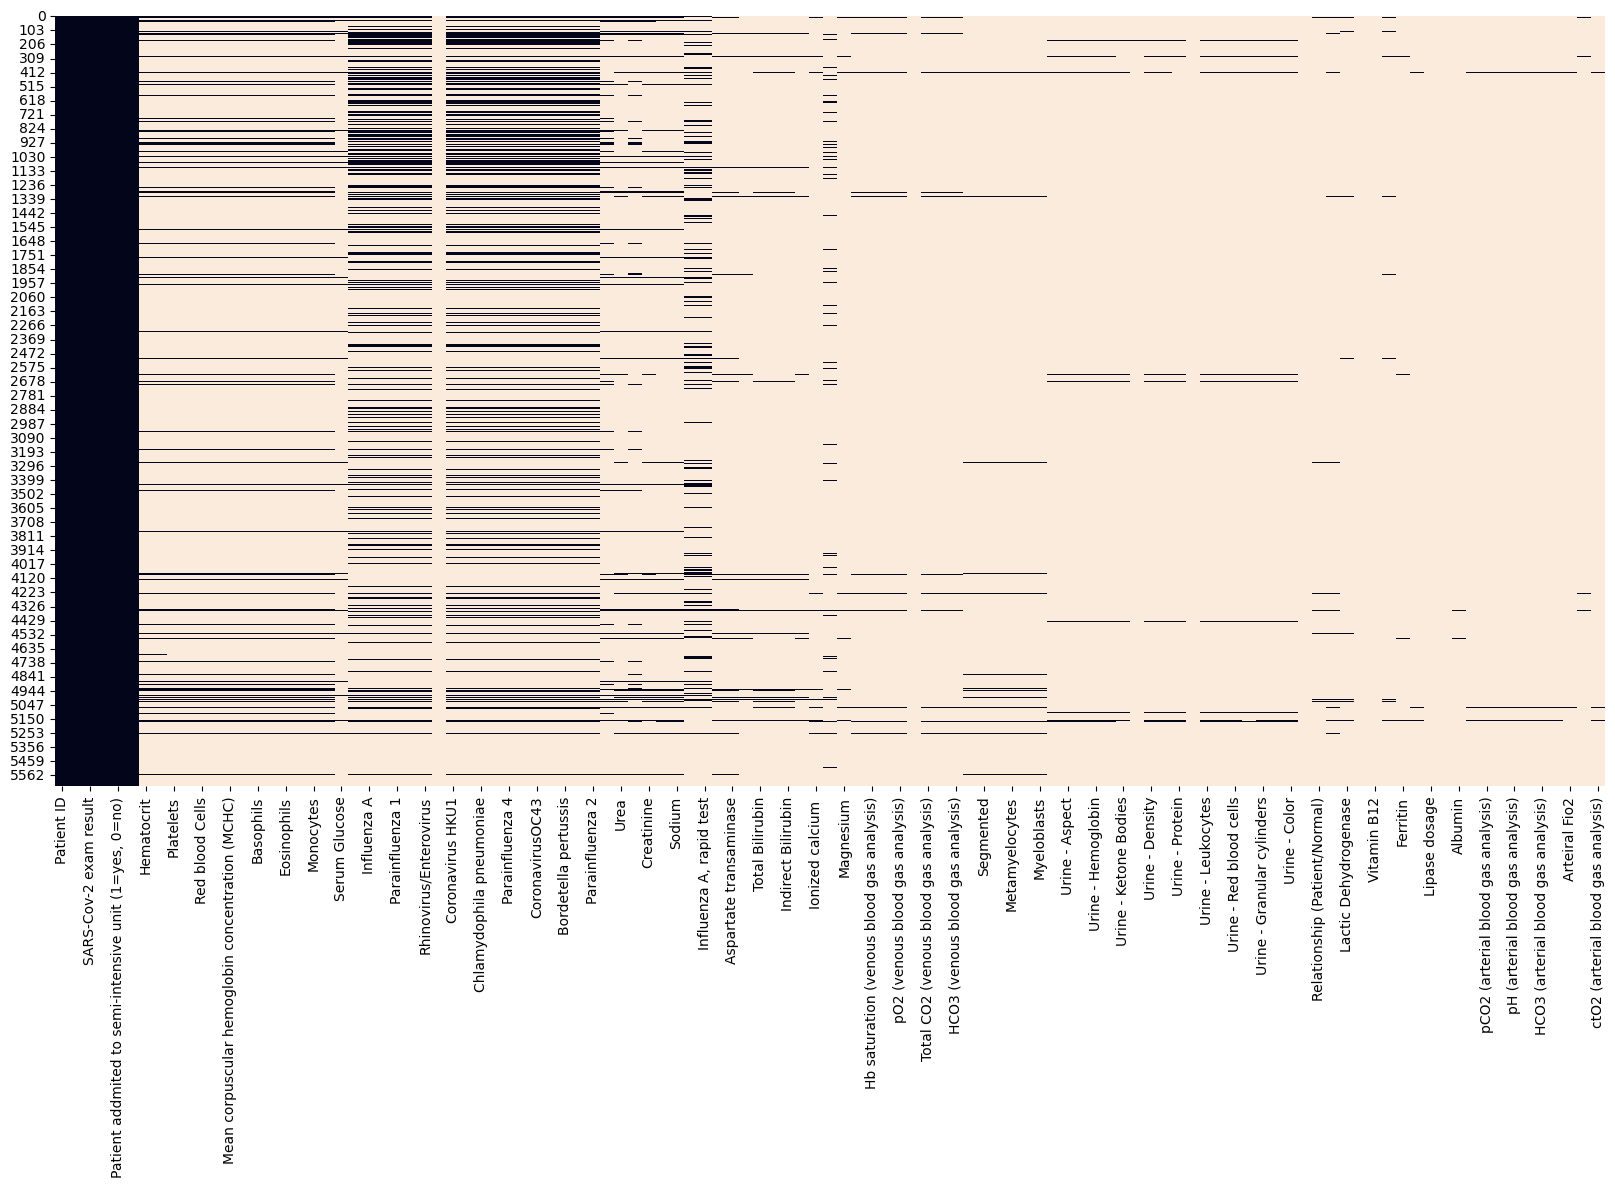

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)


In [12]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

# Analyse du Fond 
## 1. Visualisation initiale - Elimination des colonnes inutiles

In [13]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

<Axes: >

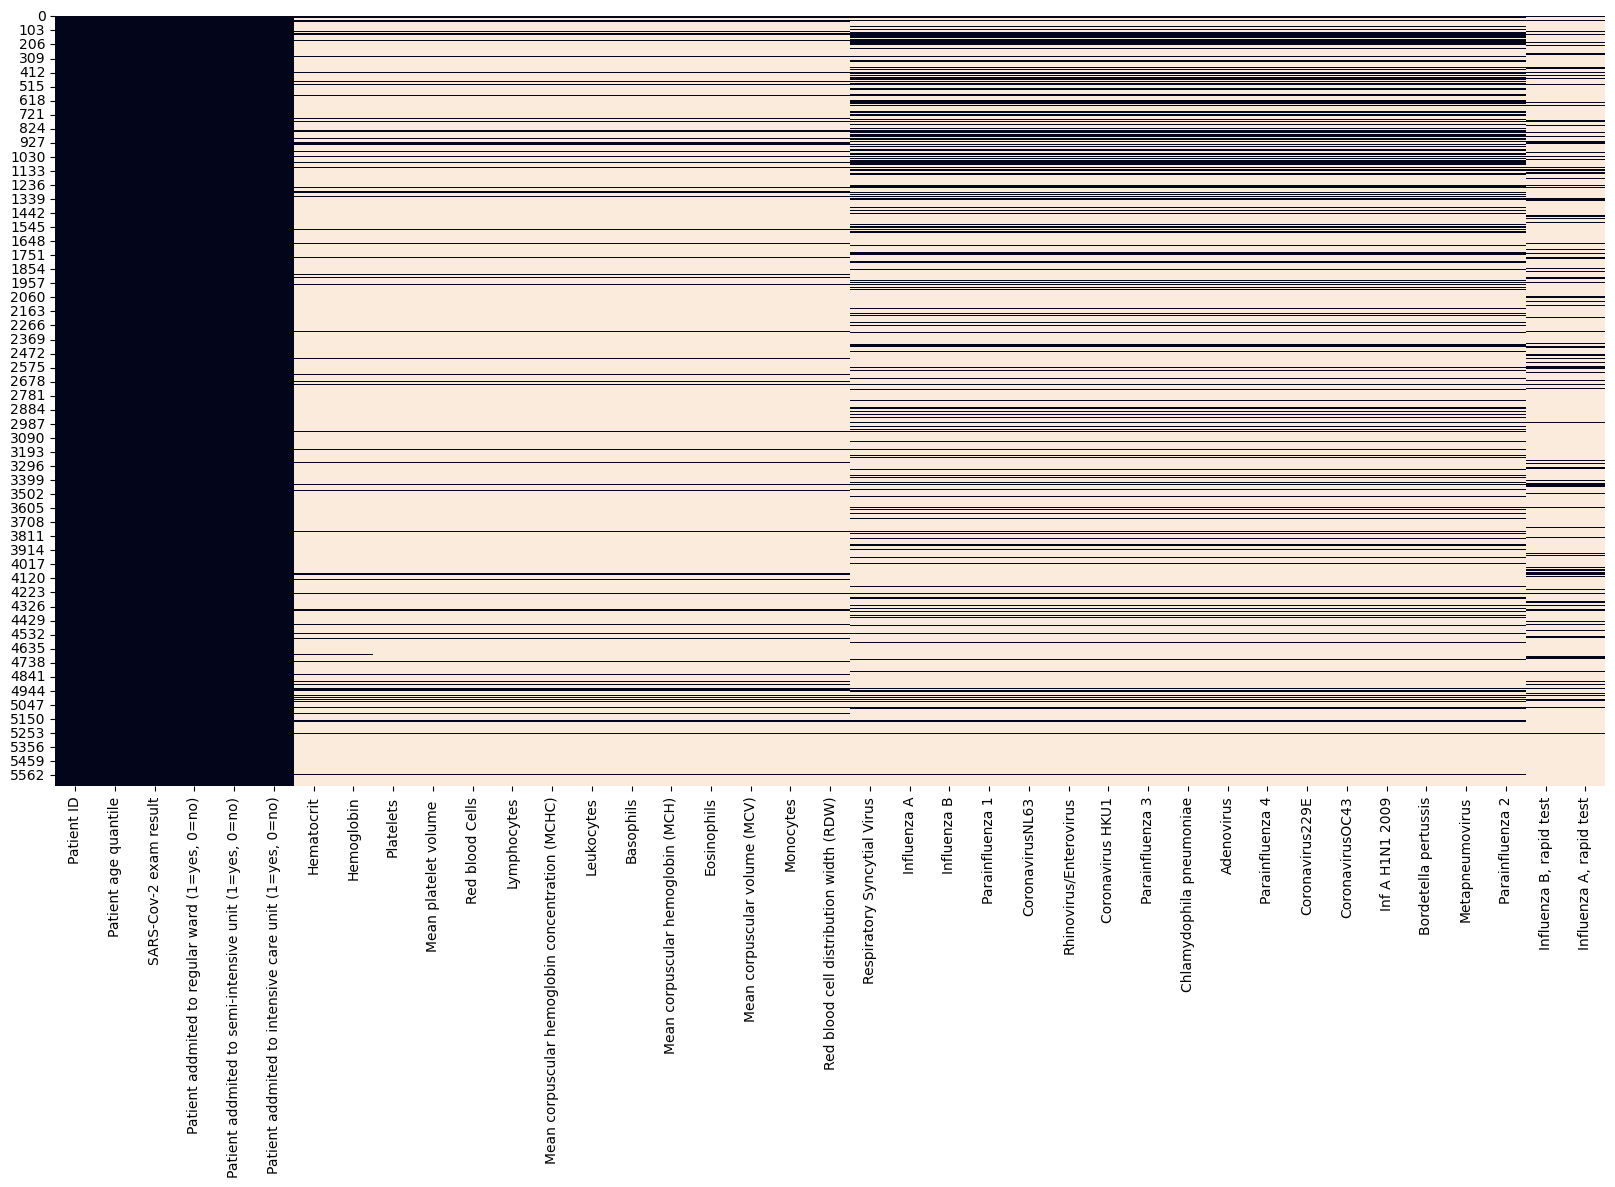

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [15]:
df = df.drop('Patient ID', axis = 1)

## Examen de la colonnes target 

In [16]:
df['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    5086
positive     558
Name: count, dtype: int64

In [17]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

## histograms des variables continues  

C:\Users\Omar\AppData\Local\Temp\ipykernel_18276\1693567820.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(1,2))


<Figure size 100x200 with 0 Axes>

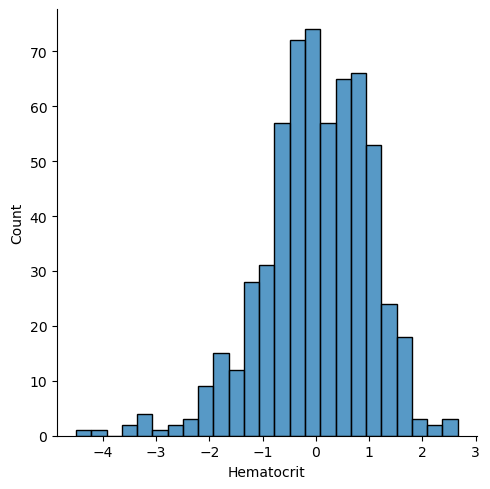

<Figure size 100x200 with 0 Axes>

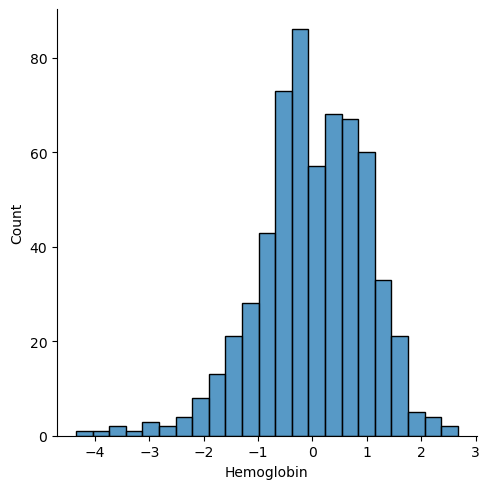

<Figure size 100x200 with 0 Axes>

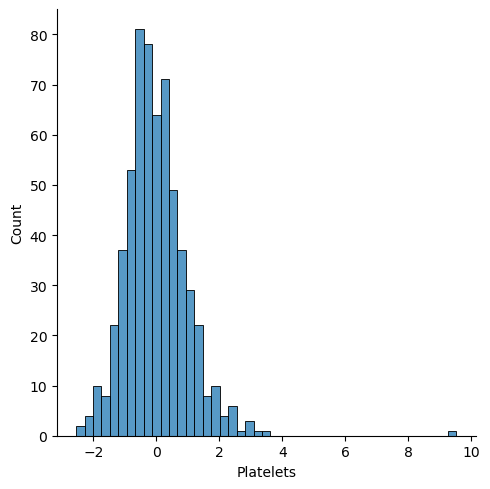

<Figure size 100x200 with 0 Axes>

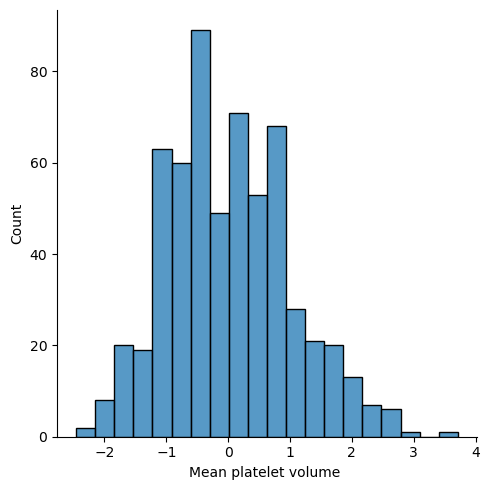

<Figure size 100x200 with 0 Axes>

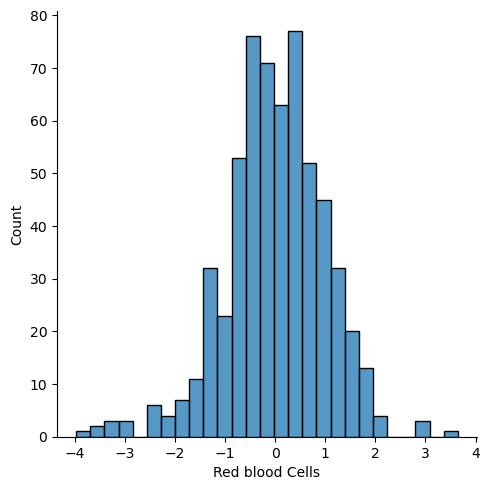

<Figure size 100x200 with 0 Axes>

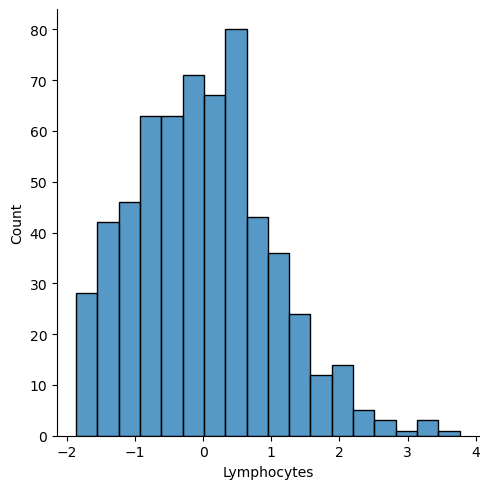

<Figure size 100x200 with 0 Axes>

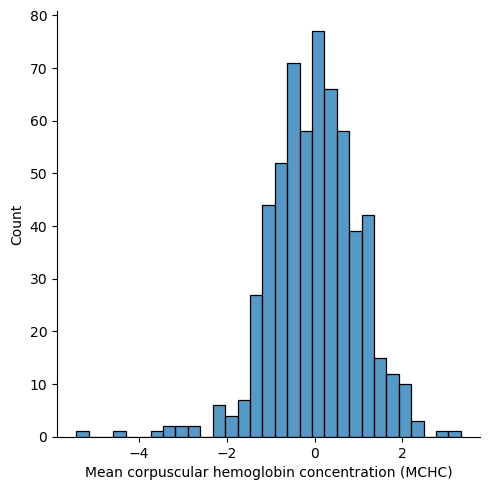

<Figure size 100x200 with 0 Axes>

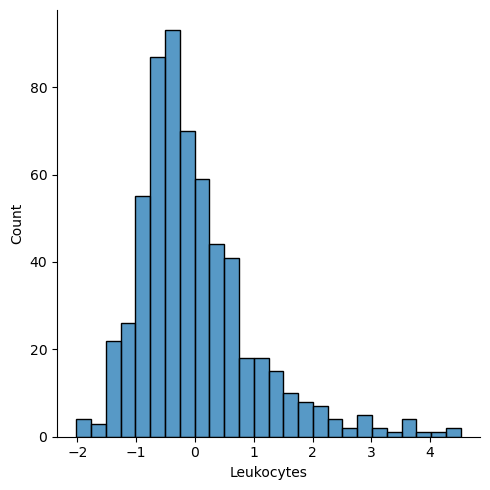

<Figure size 100x200 with 0 Axes>

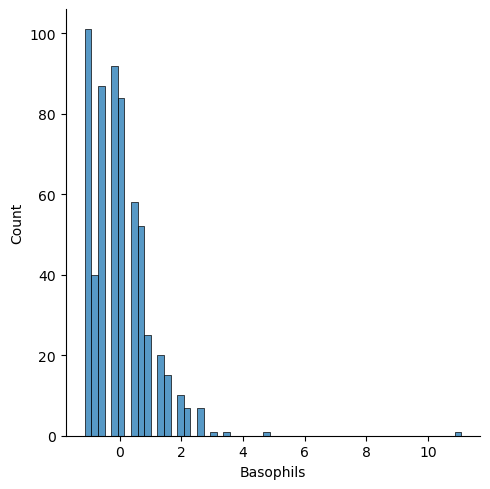

<Figure size 100x200 with 0 Axes>

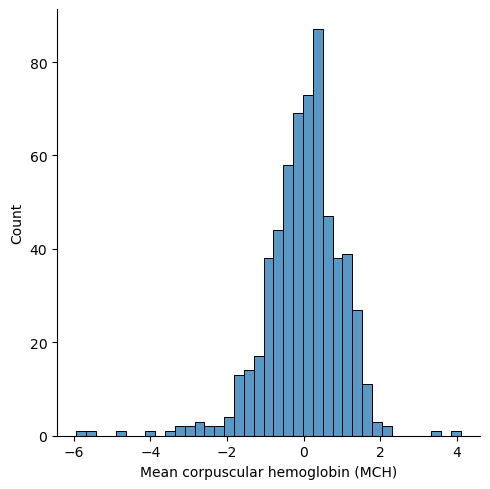

<Figure size 100x200 with 0 Axes>

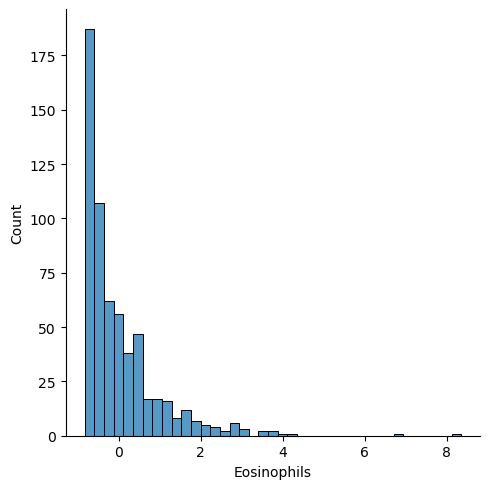

<Figure size 100x200 with 0 Axes>

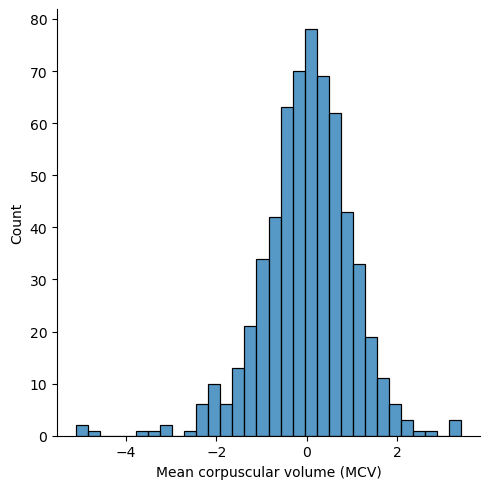

<Figure size 100x200 with 0 Axes>

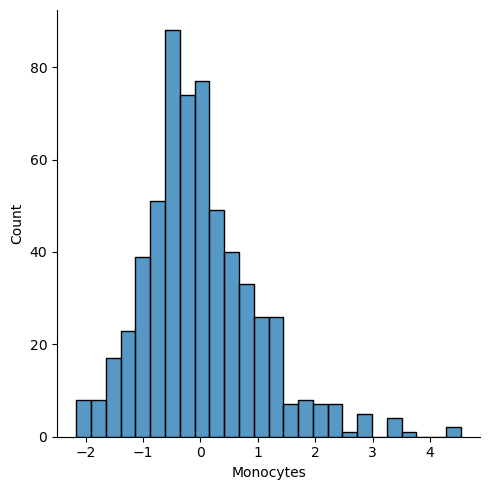

<Figure size 100x200 with 0 Axes>

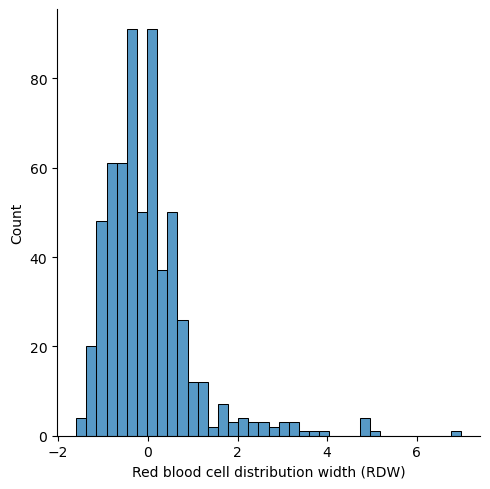

In [18]:
for col in df.select_dtypes('float'):
    plt.figure(figsize=(1,2))
    sns.displot(df[col])

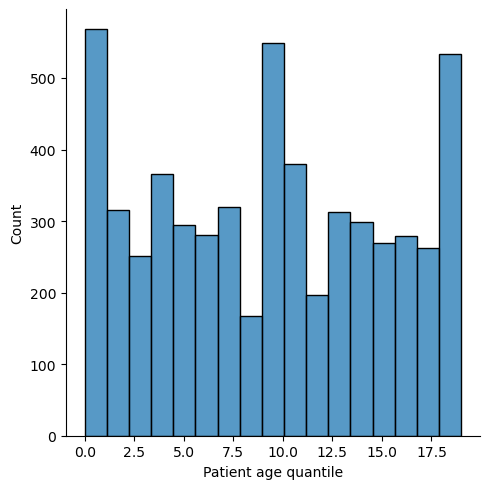

In [19]:
sns.displot(df['Patient age quantile'])

## Variables Qualitatives

In [20]:
df['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [21]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50}{df[col].unique()}')

SARS-Cov-2 exam result----------------------------['negative' 'positive']
Respiratory Syncytial Virus-----------------------[nan 'not_detected' 'detected']
Influenza A---------------------------------------[nan 'not_detected' 'detected']
Influenza B---------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------[nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------[nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------[nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------[nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------[nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------[nan 'not_detected' 'detected']
Adenovirus----------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------[nan 'not_detected' 'detected']
Coronavirus229E---------

### Graphes camber

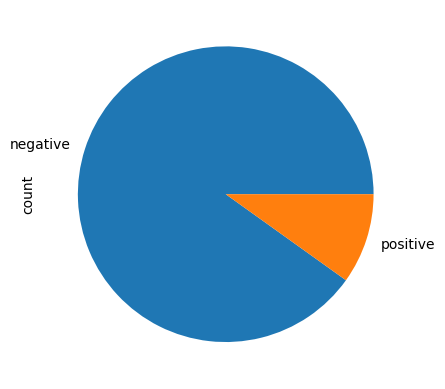

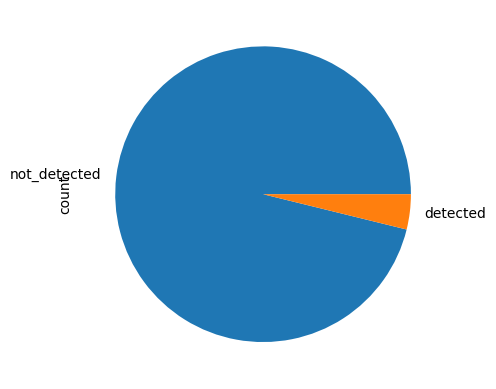

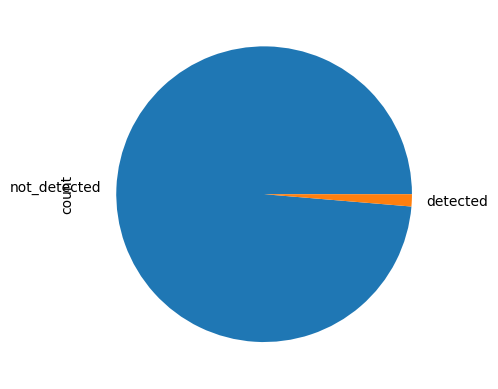

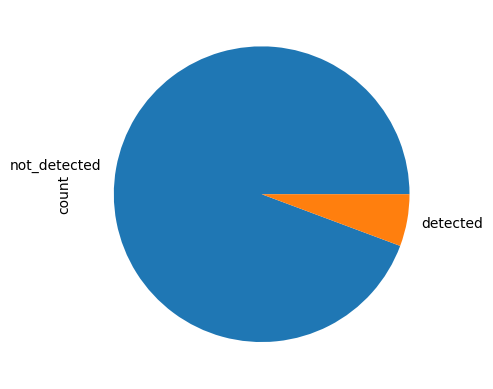

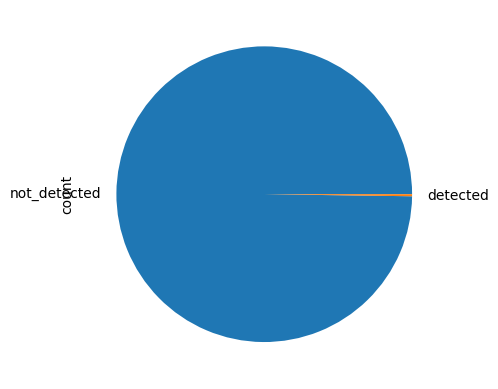

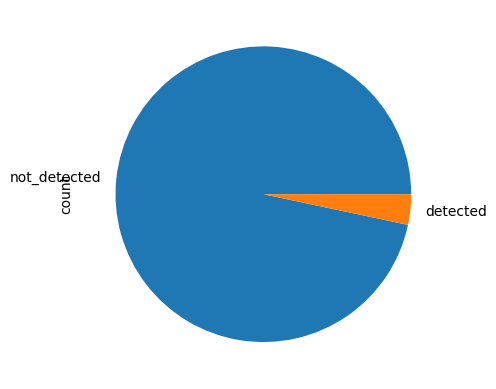

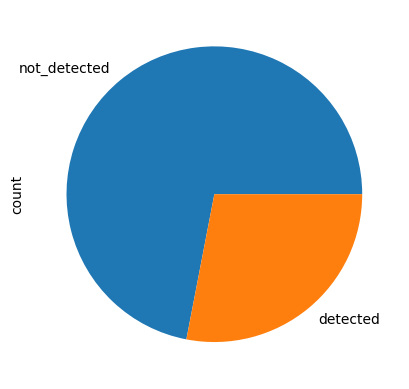

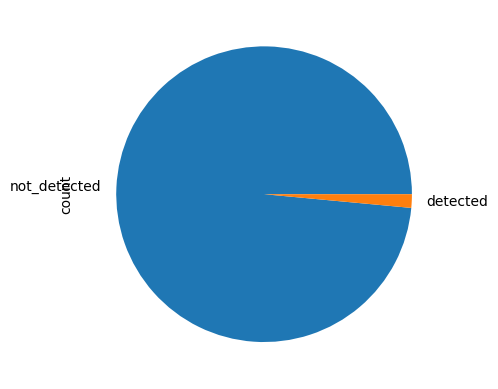

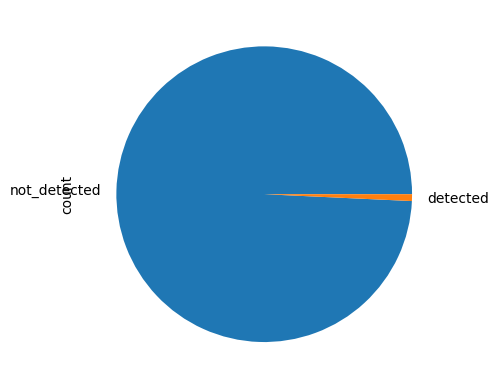

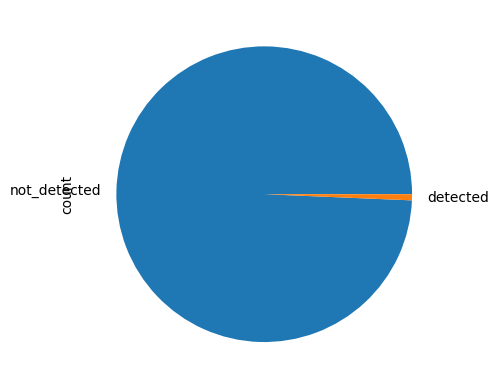

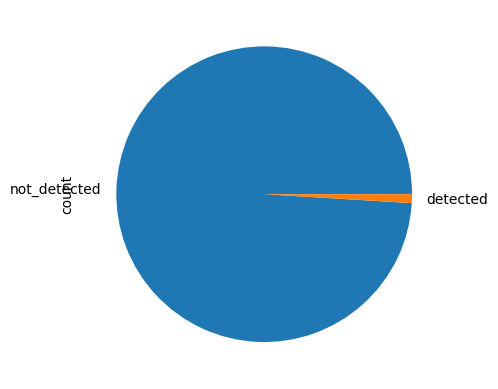

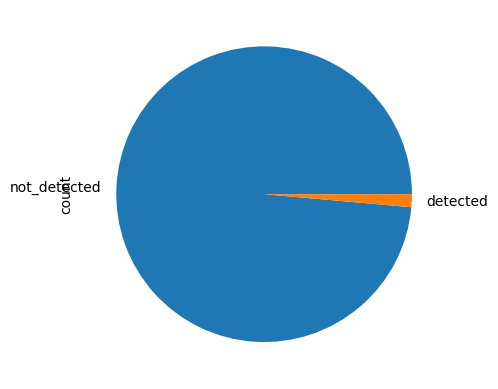

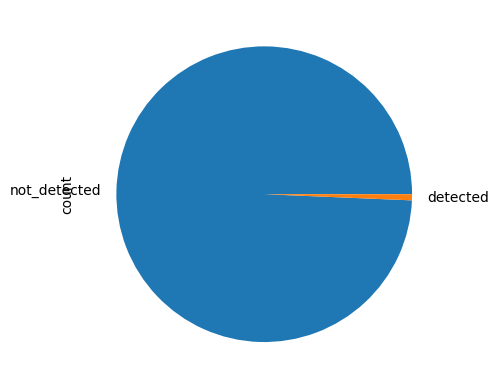

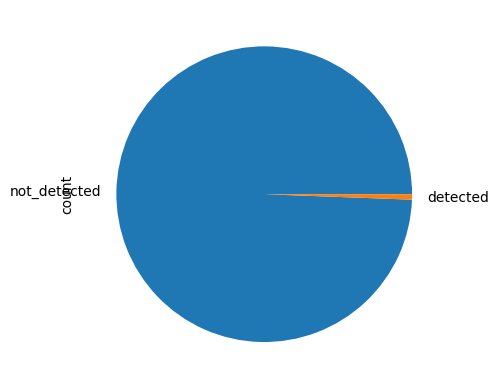

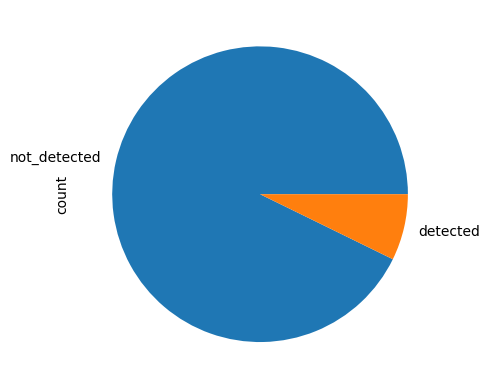

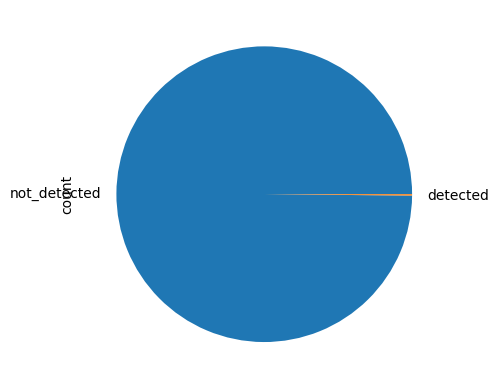

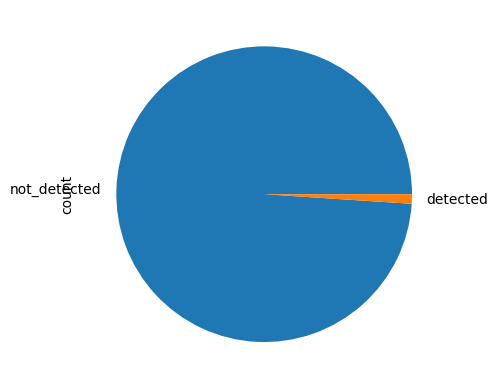

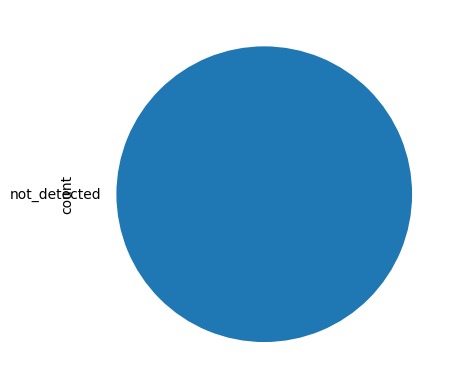

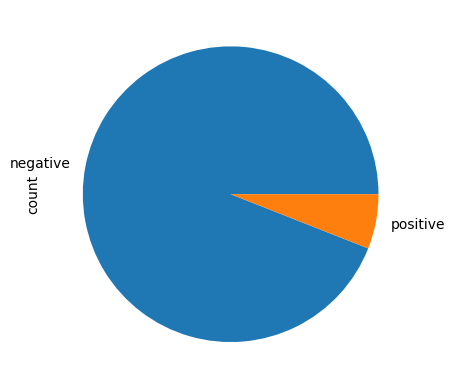

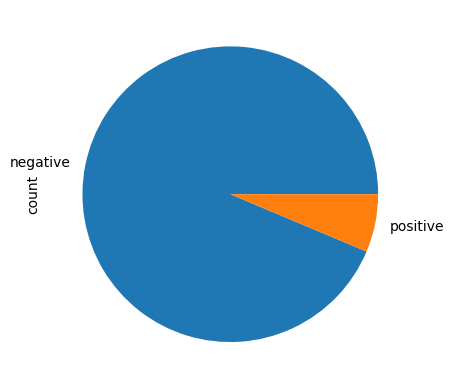

In [22]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

## Relation Target/Variables

### Création de sous-ensemble positifs et négatifs

In [23]:
positive_df =df[df['SARS-Cov-2 exam result'] == 'positive']

In [24]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

### Création des ensembles Blood et viral

In [25]:
missing_rate = df.isna().sum()/df.shape[0]

In [26]:
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

In [27]:
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

### Target/Blood

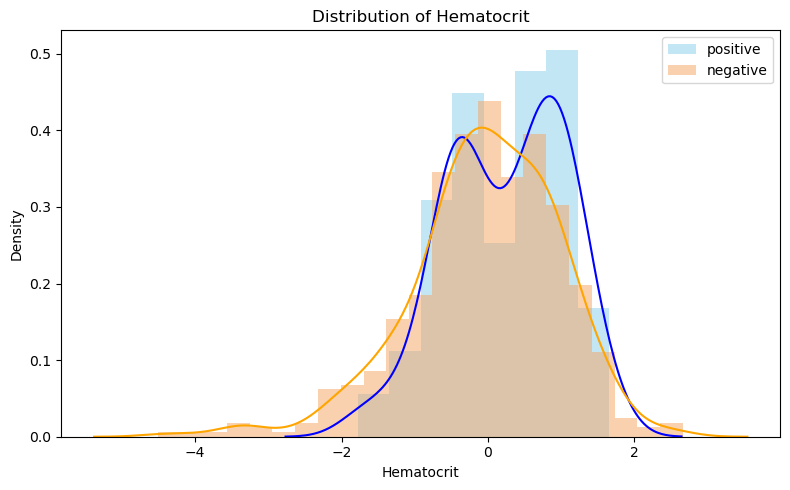

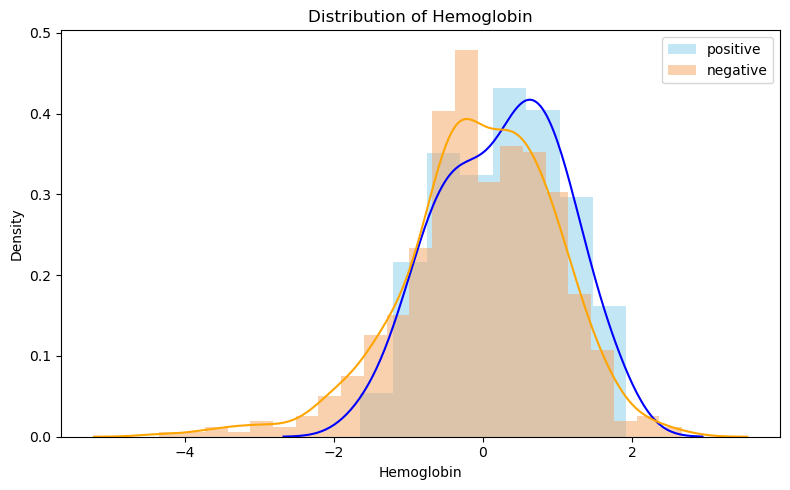

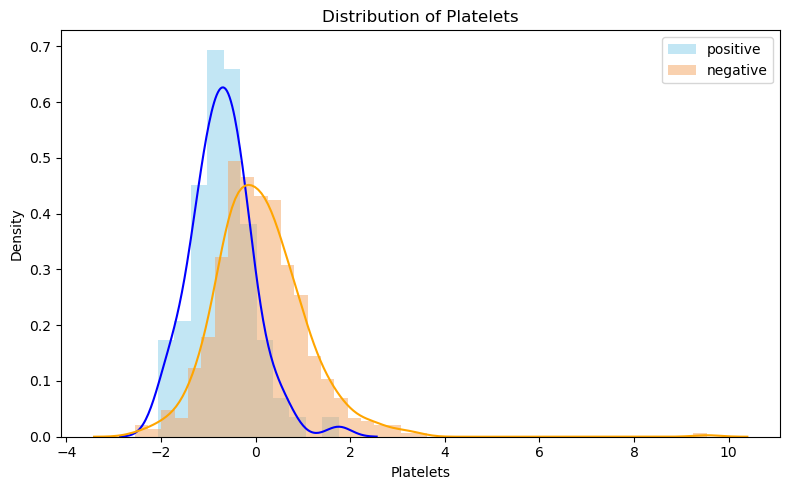

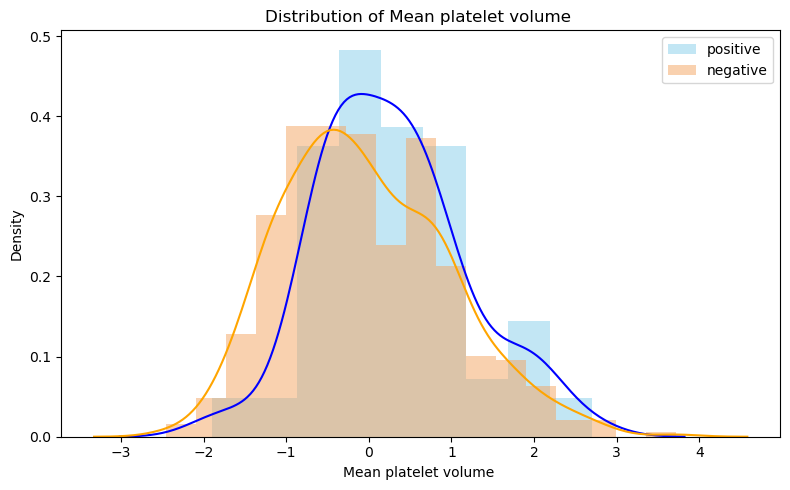

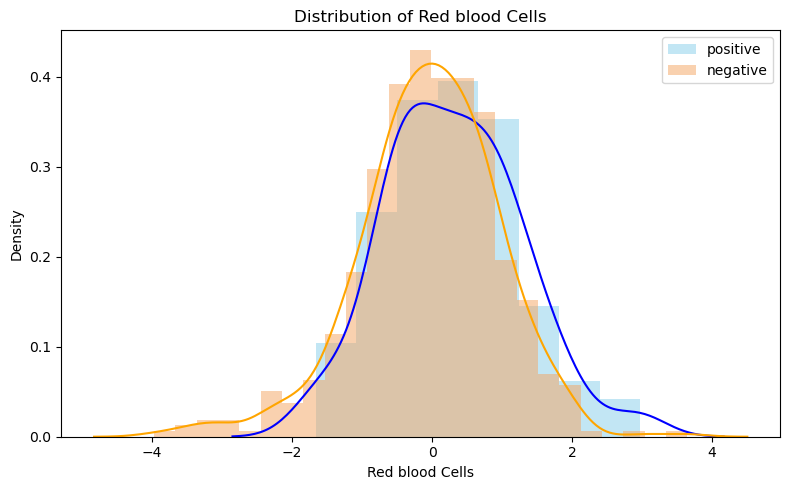

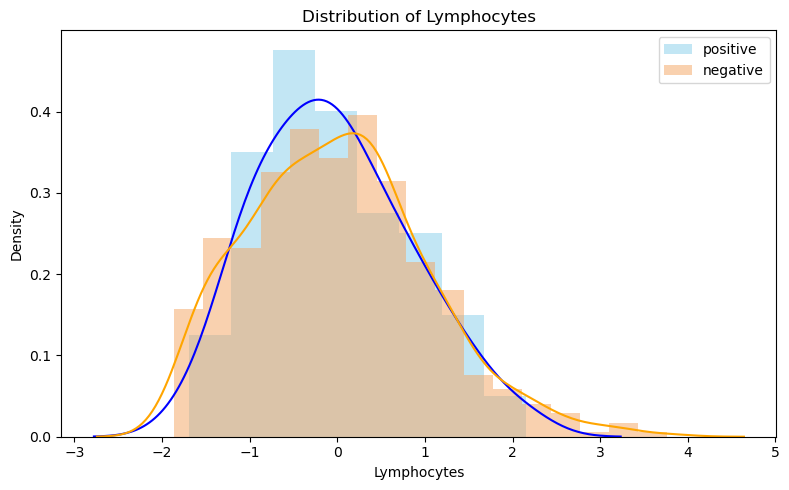

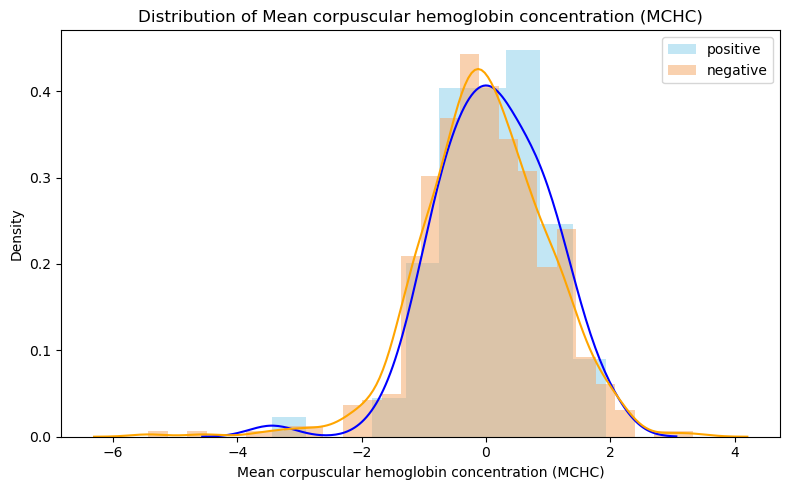

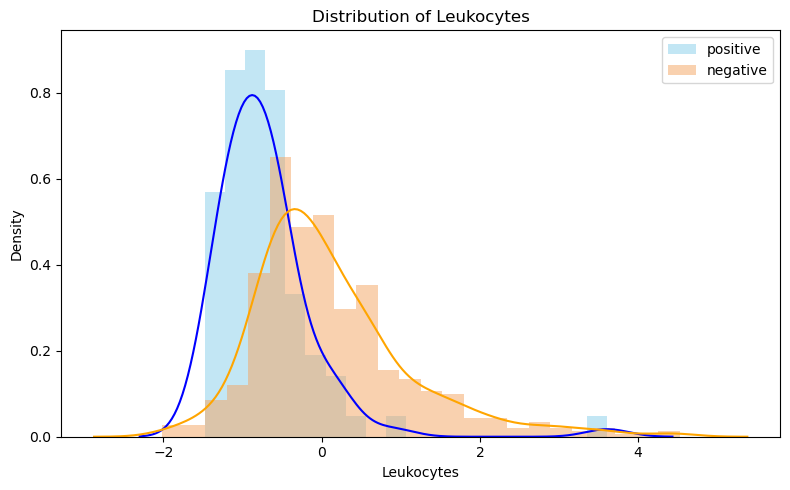

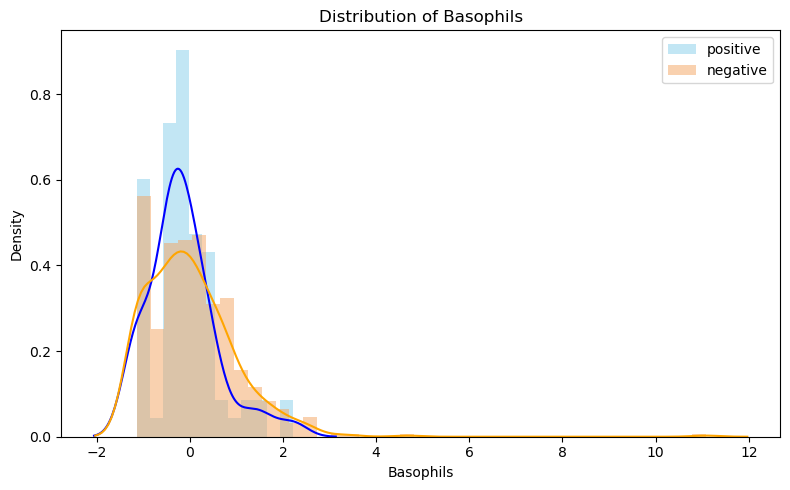

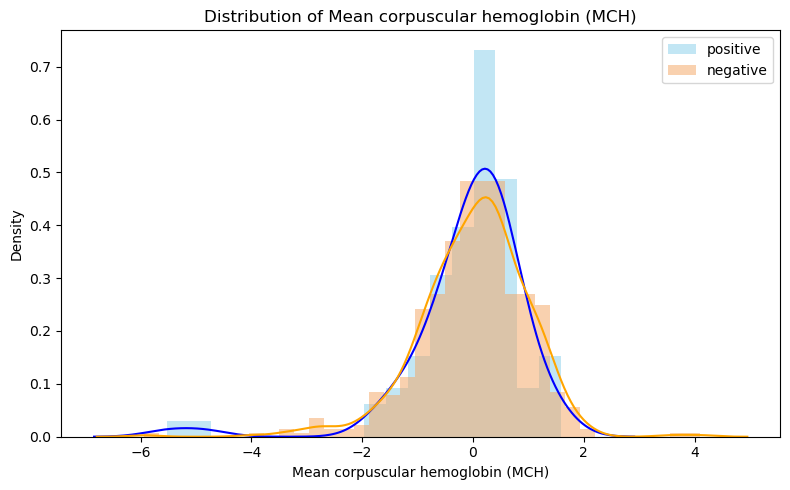

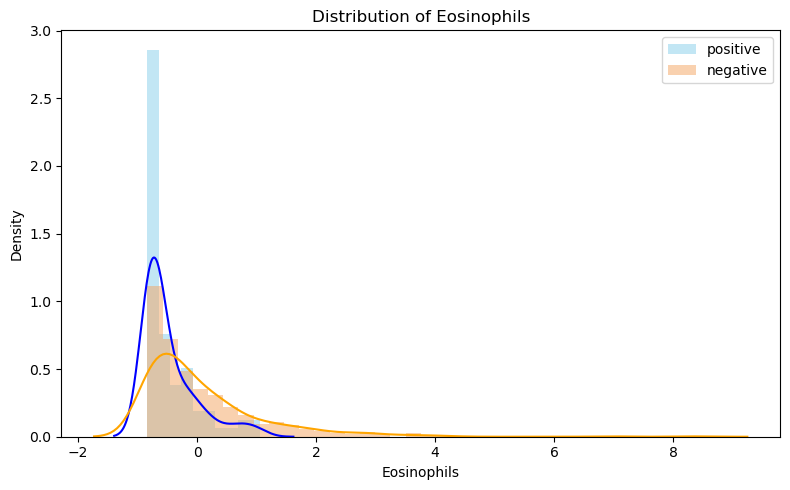

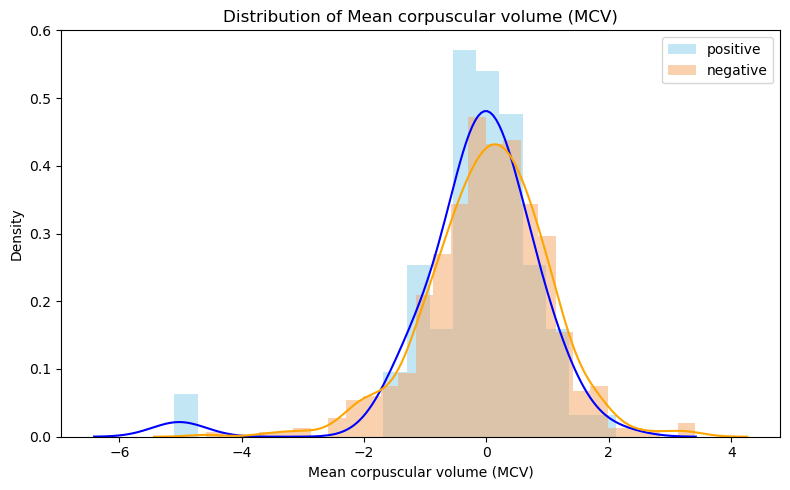

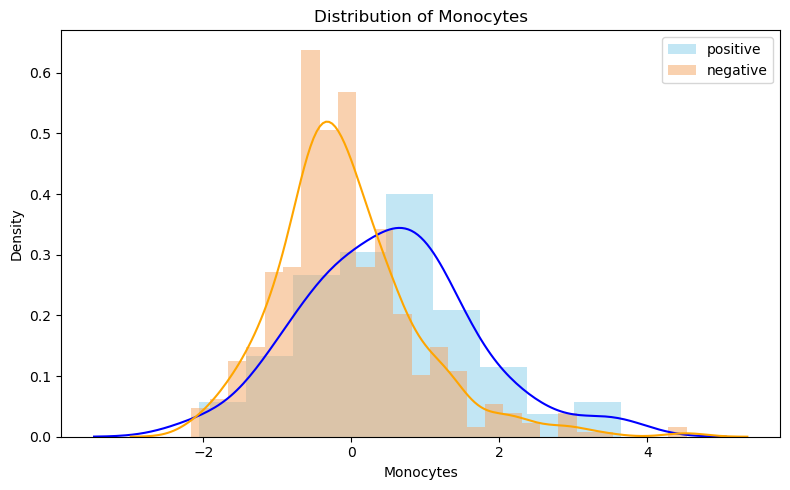

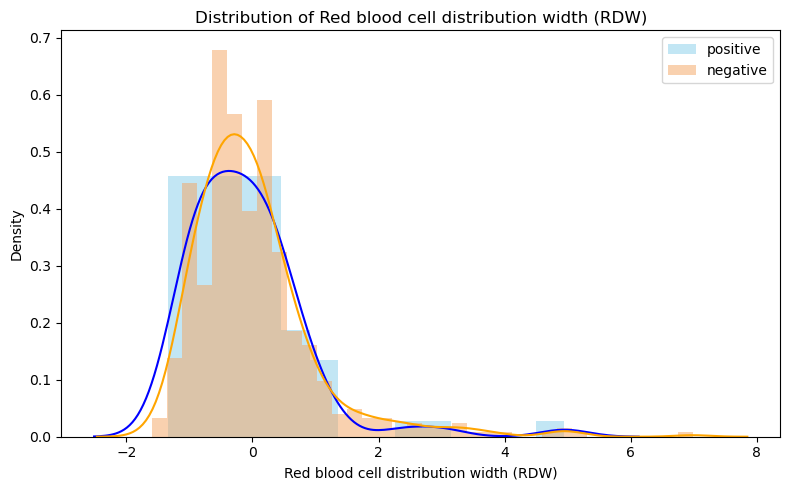

In [28]:
for col in blood_columns:
    plt.figure(figsize=(8, 5))

    sns.histplot(data=positive_df, x=col, stat='density',color='skyblue', label='positive', alpha=0.5, edgecolor=None)
    sns.histplot(data=negative_df, x=col, stat='density',color='sandybrown', label='negative', alpha=0.5, edgecolor=None)
    sns.kdeplot(data=positive_df, x=col, color='blue')
    sns.kdeplot(data=negative_df, x=col, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()



### Relation Target/age

<Axes: xlabel='Patient age quantile', ylabel='count'>

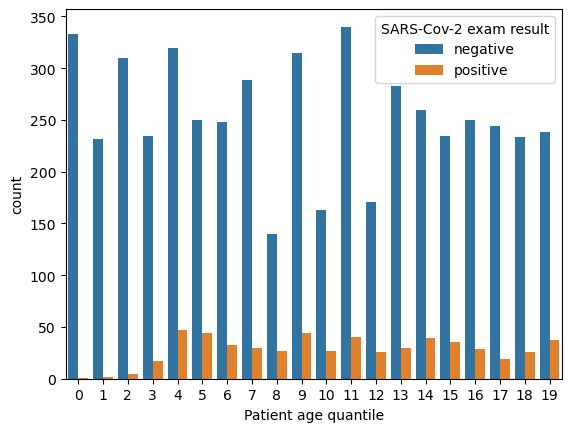

In [29]:
sns.countplot(x= 'Patient age quantile', hue = 'SARS-Cov-2 exam result', data=df)

## Relation Target/Viral

In [30]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

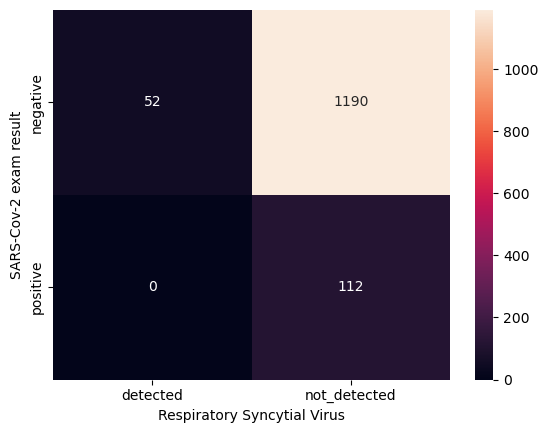

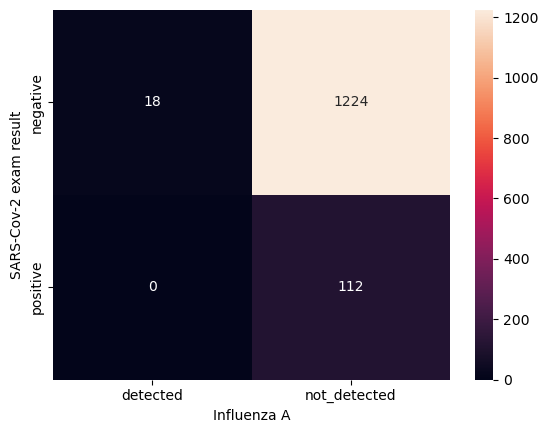

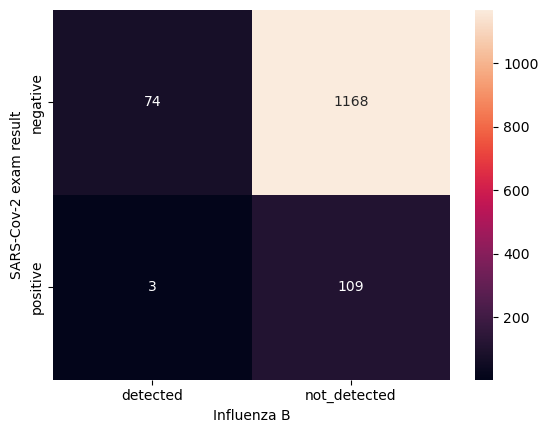

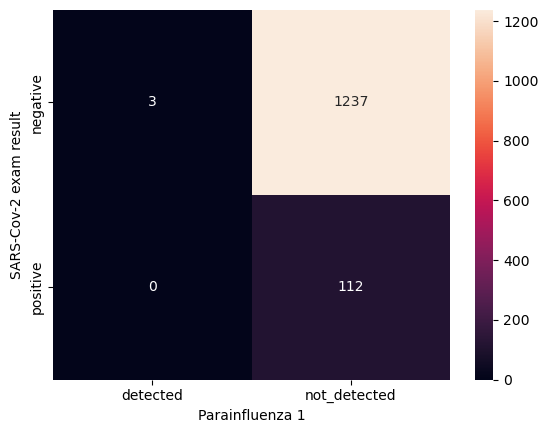

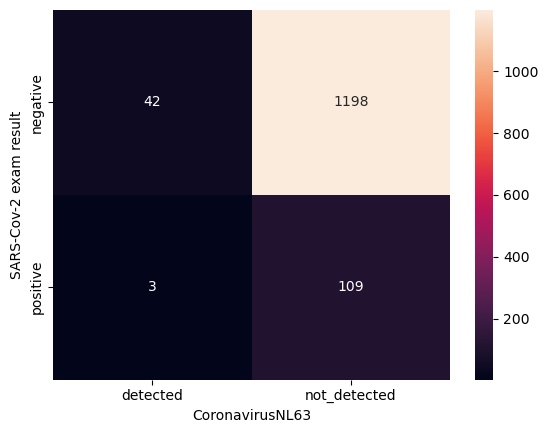

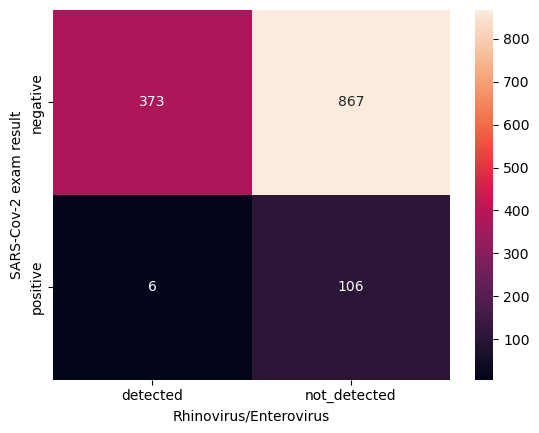

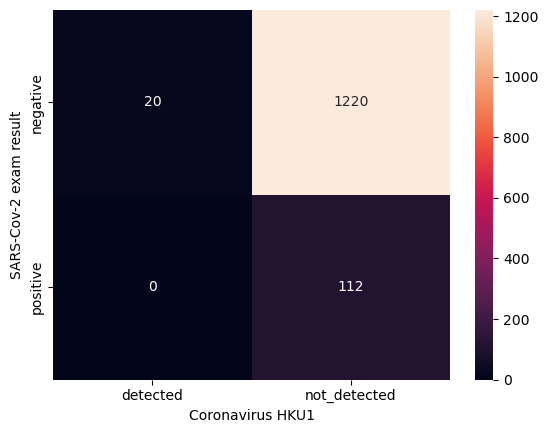

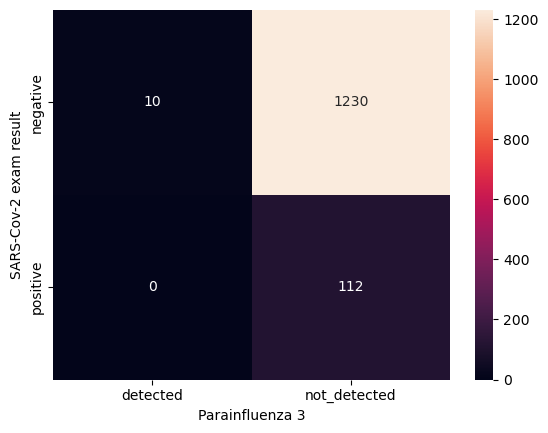

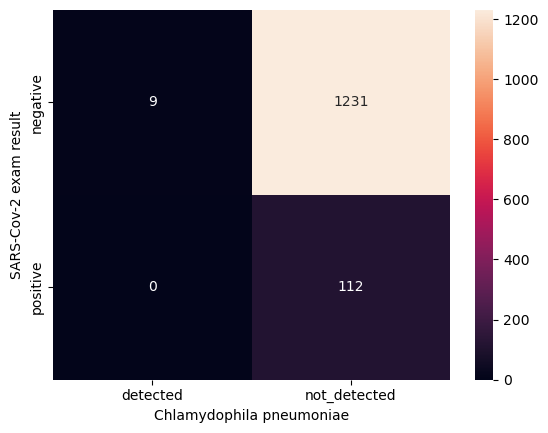

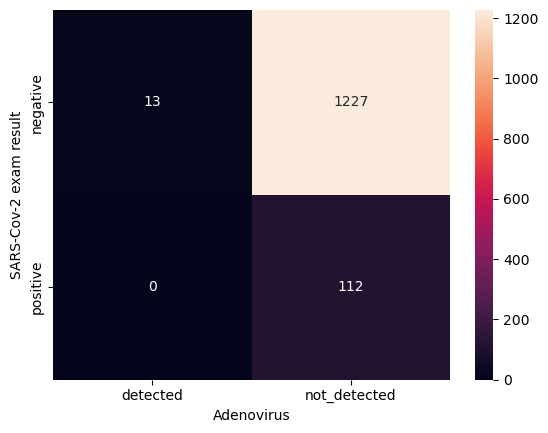

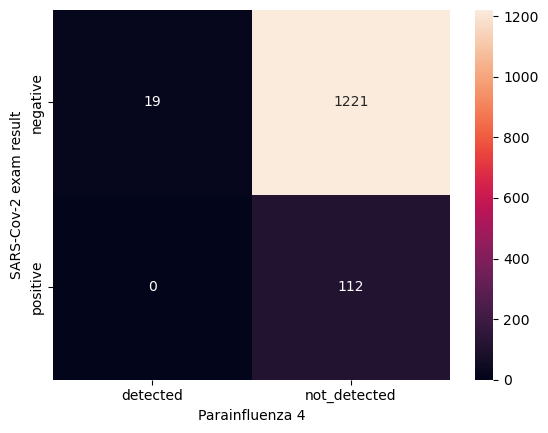

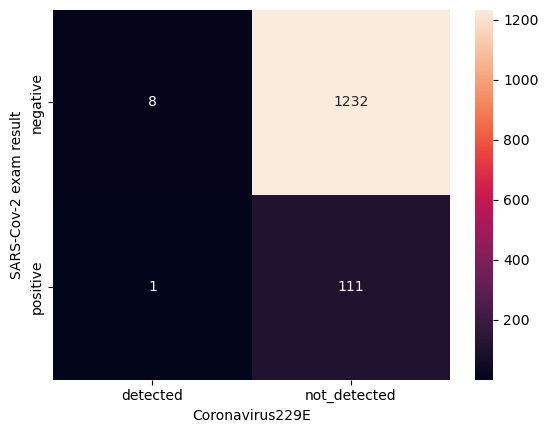

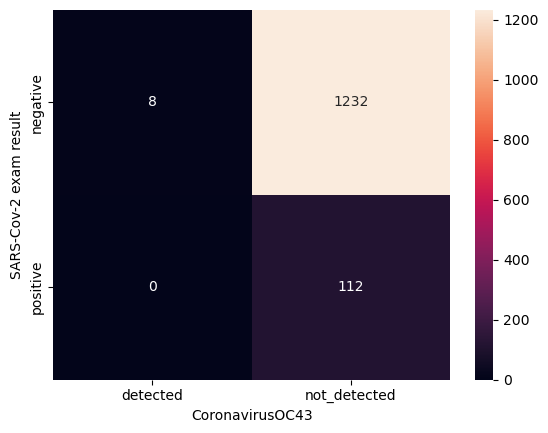

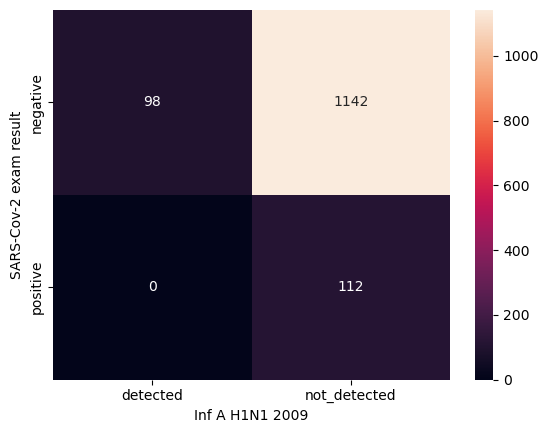

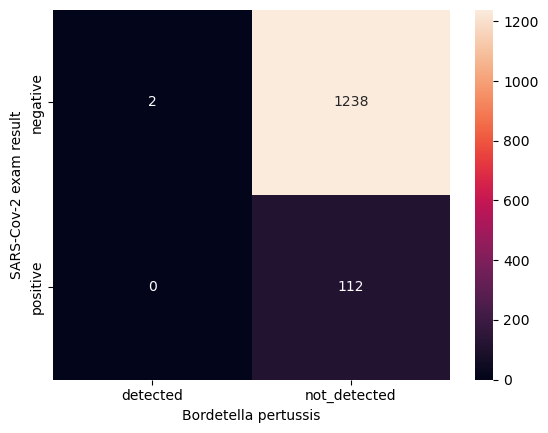

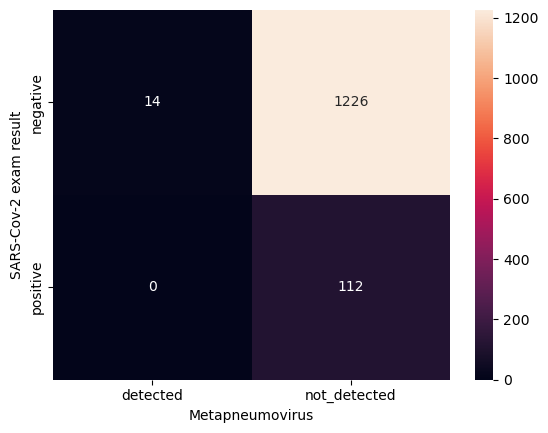

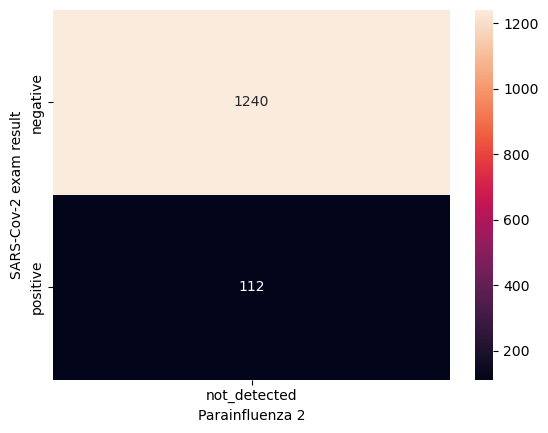

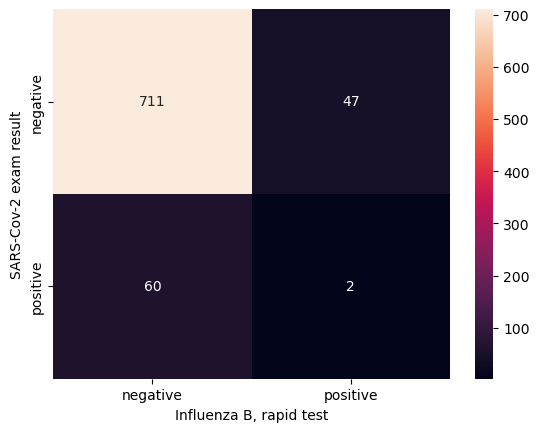

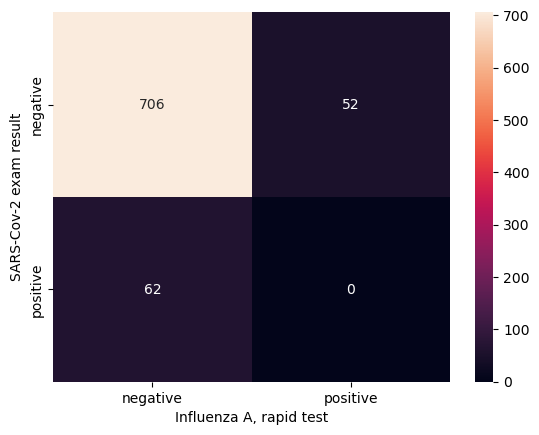

In [31]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot = True,  fmt='d')

## Analyse un peu plus Avancée 
### Relation Variables/Variables
#### relation Taux Sanguin

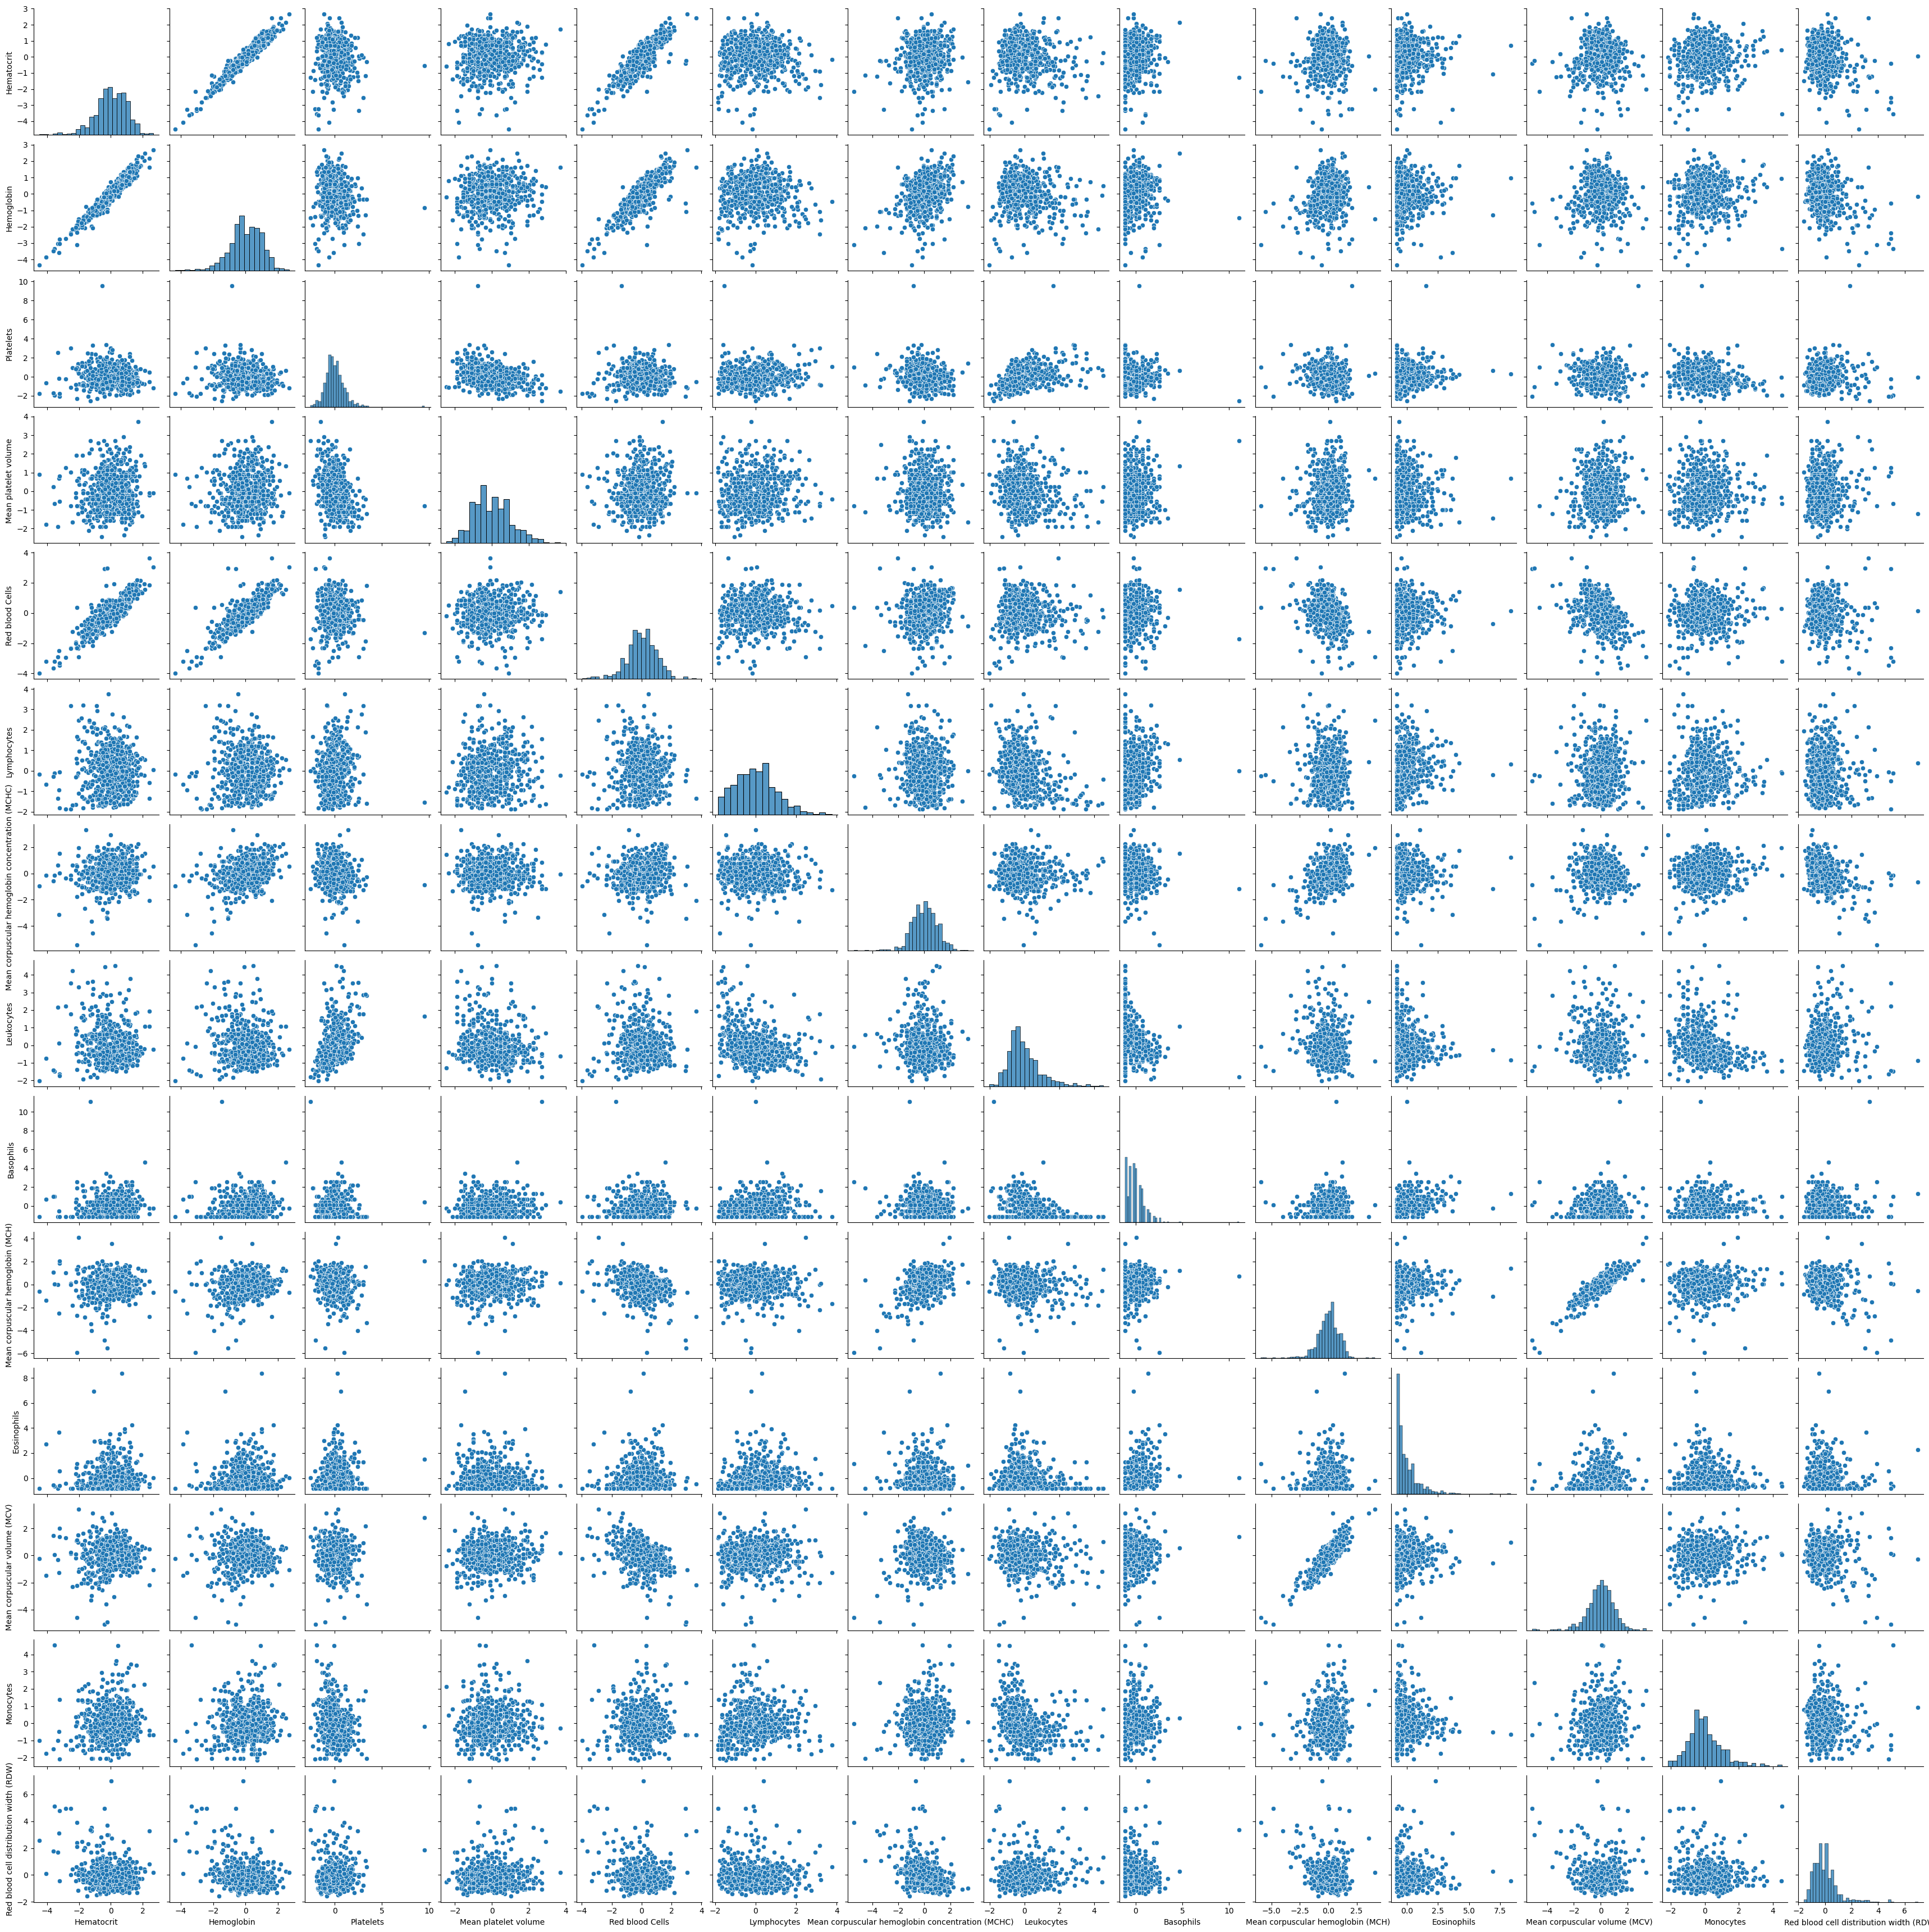

In [32]:
sns.pairplot(df[blood_columns])

<Axes: >

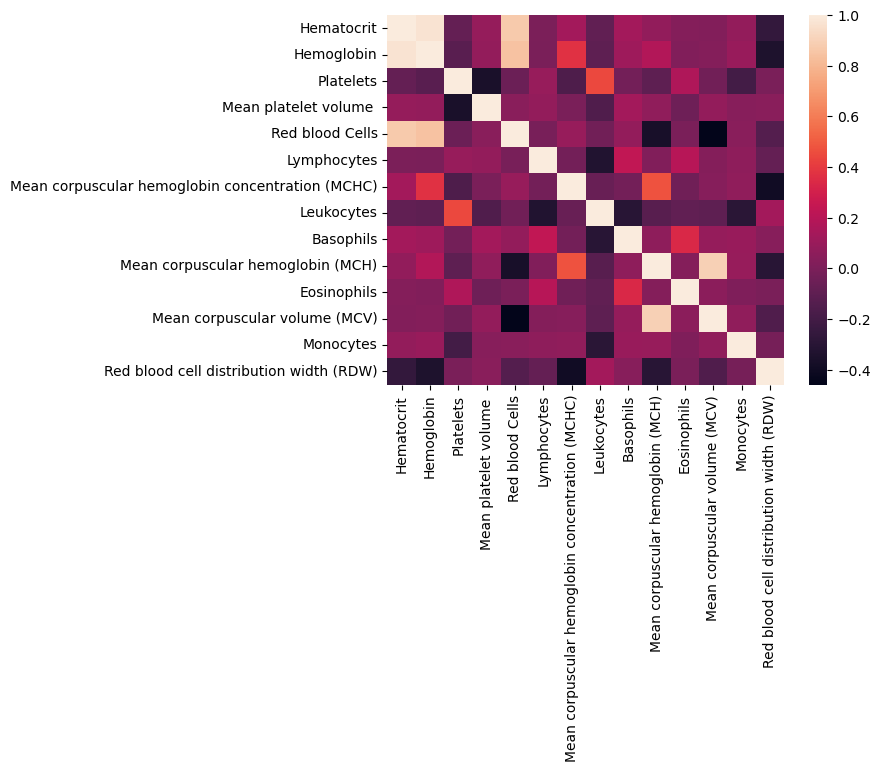

In [33]:
sns.heatmap(df[blood_columns].corr())

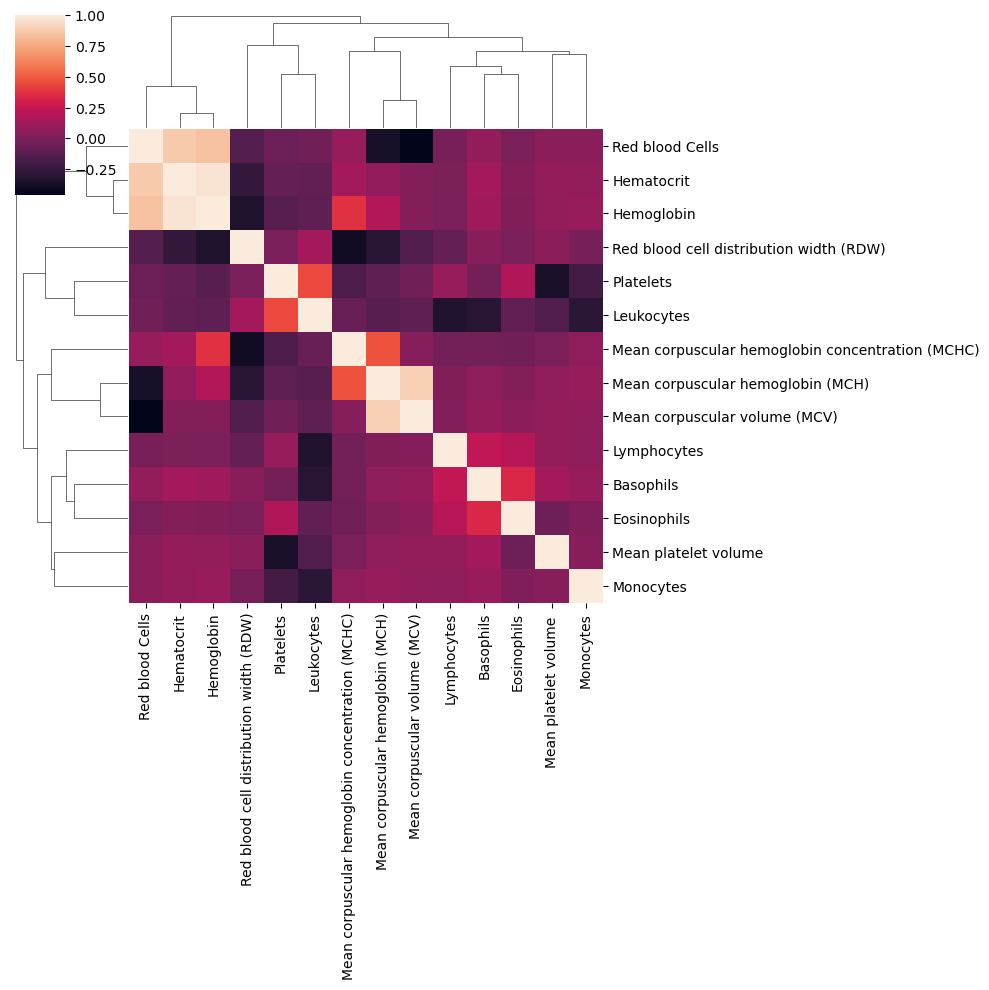

In [34]:
sns.clustermap(df[blood_columns].corr())

#### Relation Age/Sang

C:\Users\Omar\AppData\Local\Temp\ipykernel_18276\3505822551.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

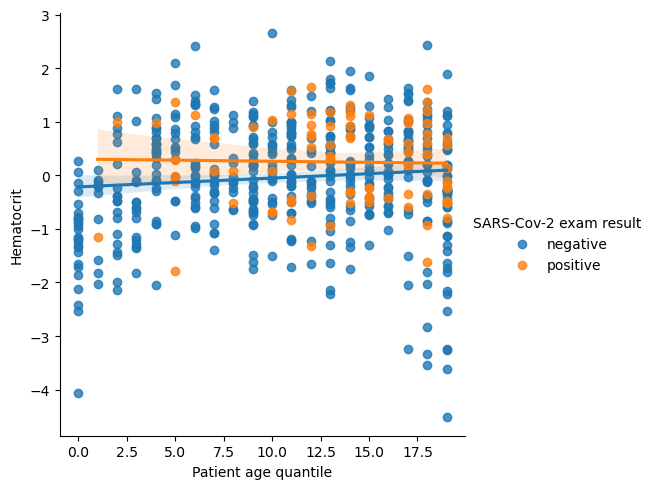

<Figure size 640x480 with 0 Axes>

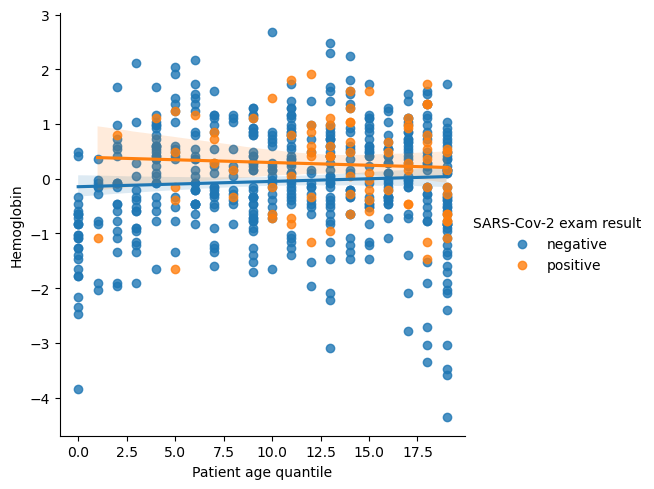

<Figure size 640x480 with 0 Axes>

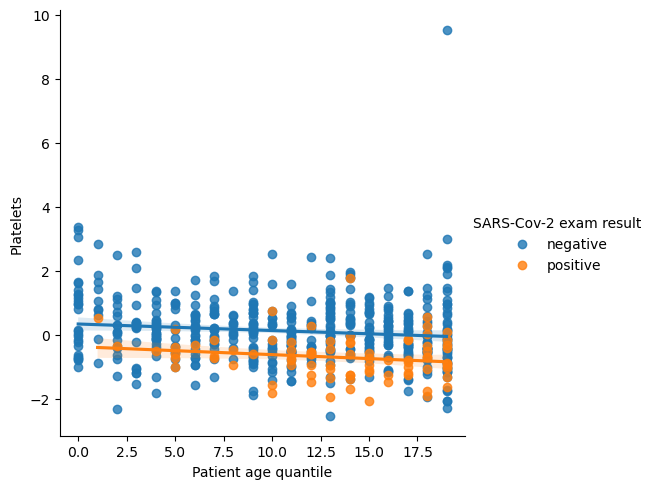

<Figure size 640x480 with 0 Axes>

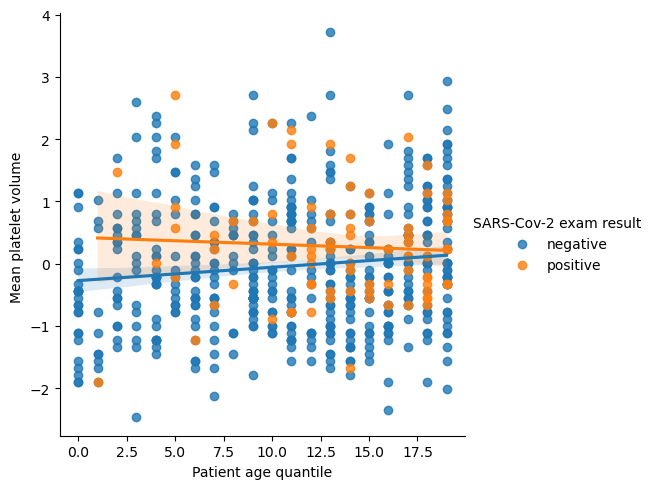

<Figure size 640x480 with 0 Axes>

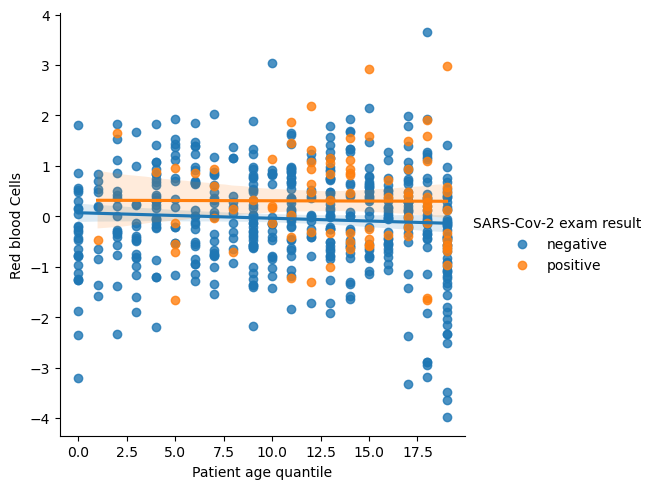

<Figure size 640x480 with 0 Axes>

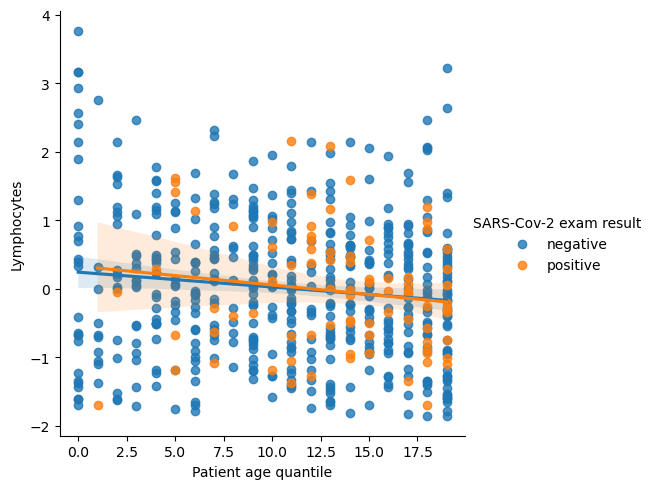

<Figure size 640x480 with 0 Axes>

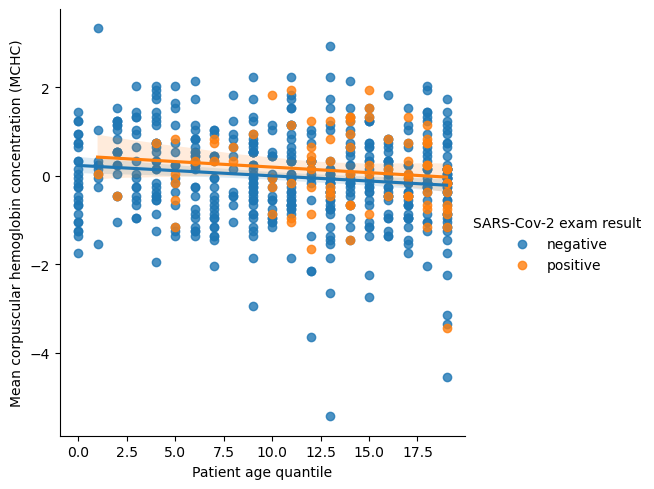

<Figure size 640x480 with 0 Axes>

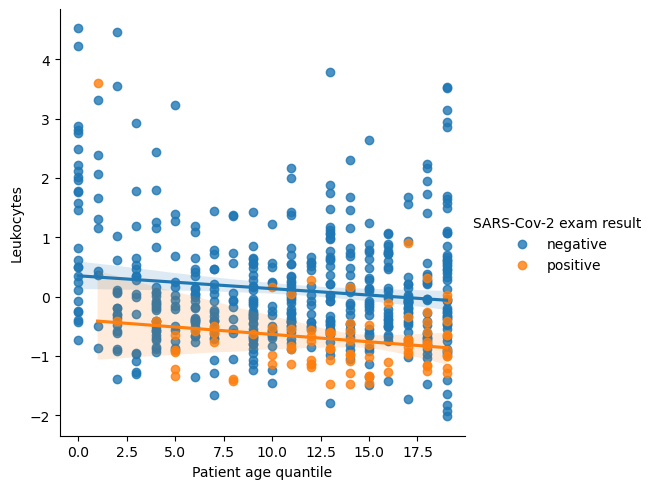

<Figure size 640x480 with 0 Axes>

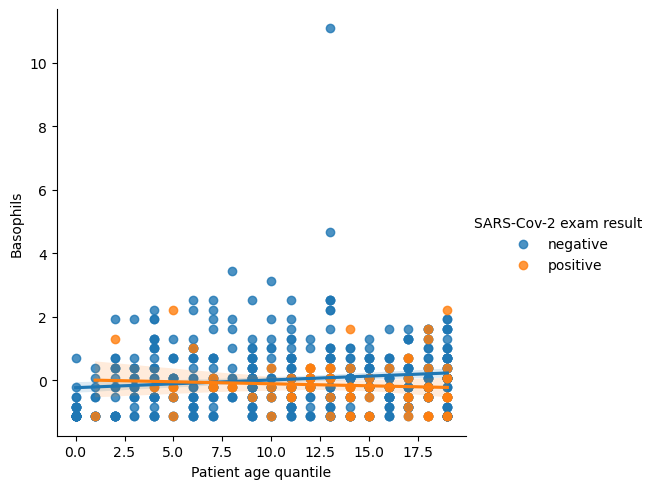

<Figure size 640x480 with 0 Axes>

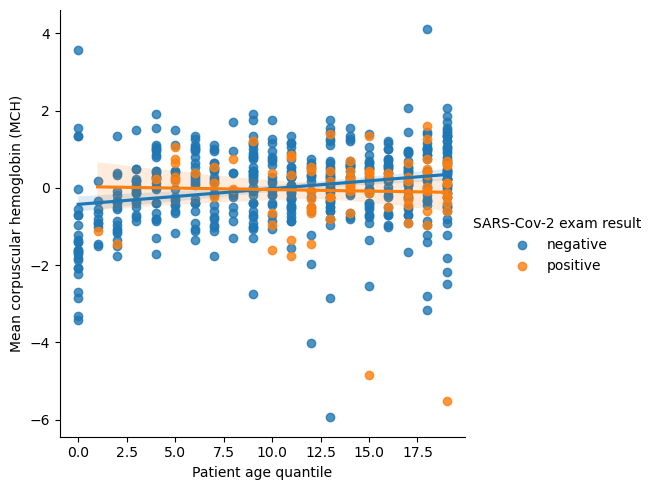

<Figure size 640x480 with 0 Axes>

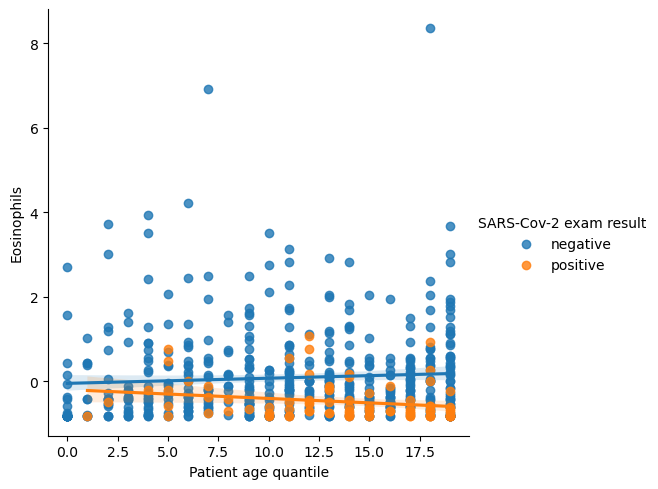

<Figure size 640x480 with 0 Axes>

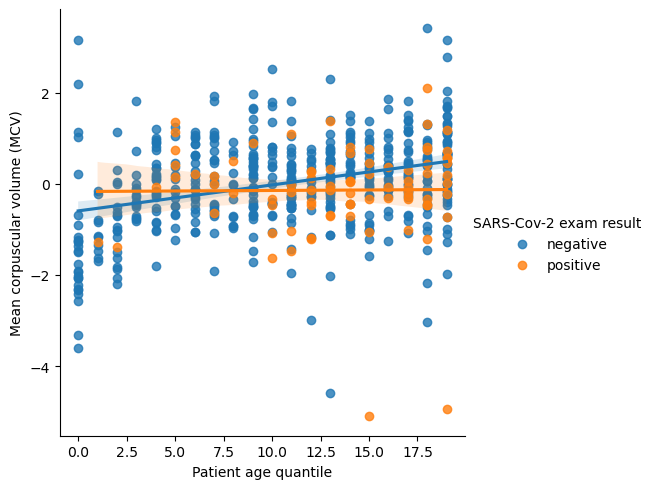

<Figure size 640x480 with 0 Axes>

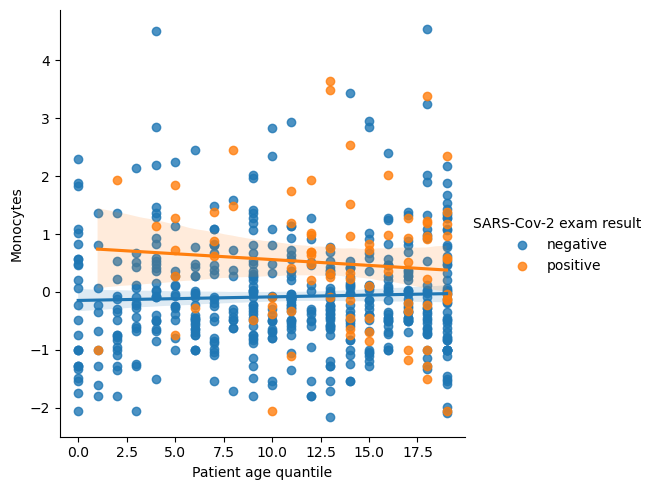

<Figure size 640x480 with 0 Axes>

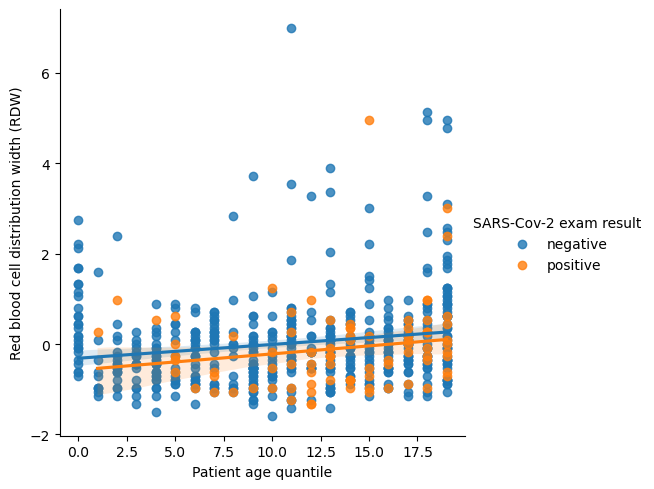

In [35]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col,hue='SARS-Cov-2 exam result', data=df)

In [36]:
df.select_dtypes(include='number').corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

### Relation entre influenza et rapid test

In [37]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [38]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

### Relation Viral/Sanguin
#### Creation d'une nouvelle variable "est malade"

In [42]:
df["est malade"] = np.sum(df[viral_columns[:-2]] == "detected",axis=1) >= 1

In [43]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

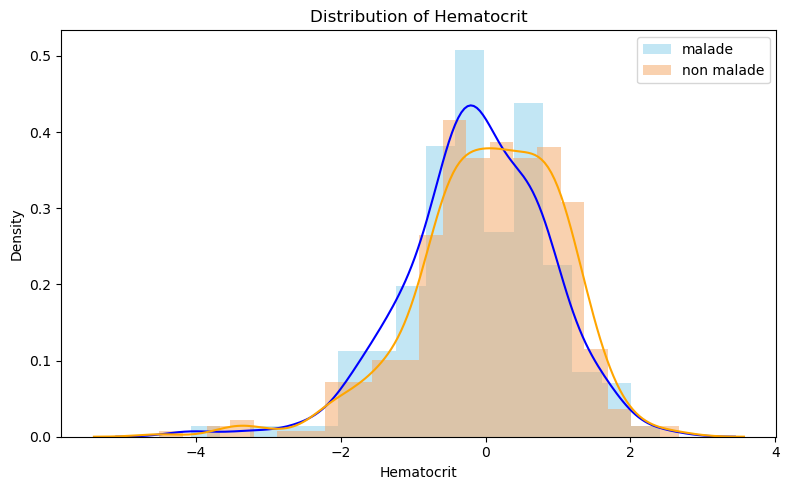

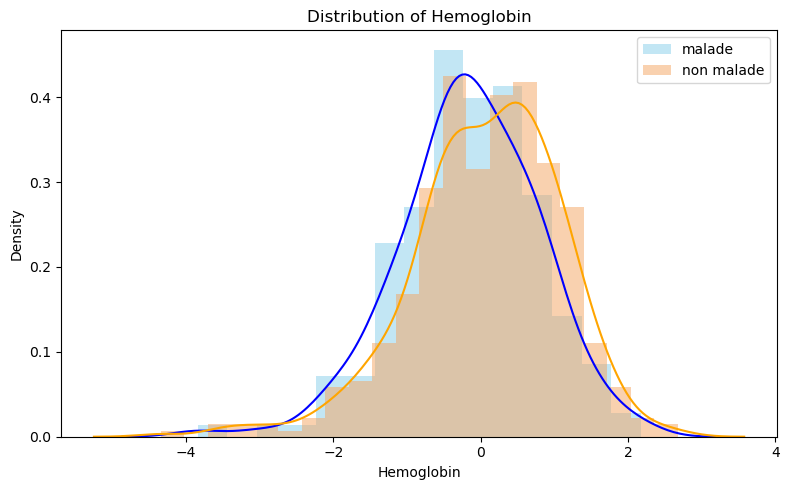

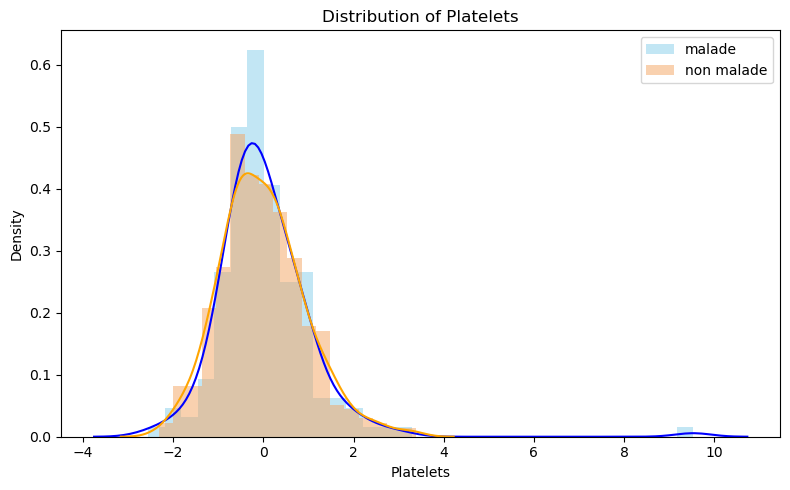

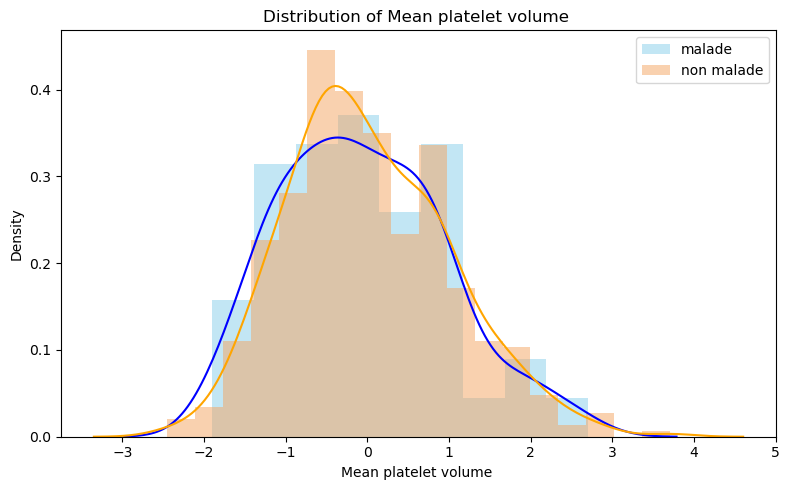

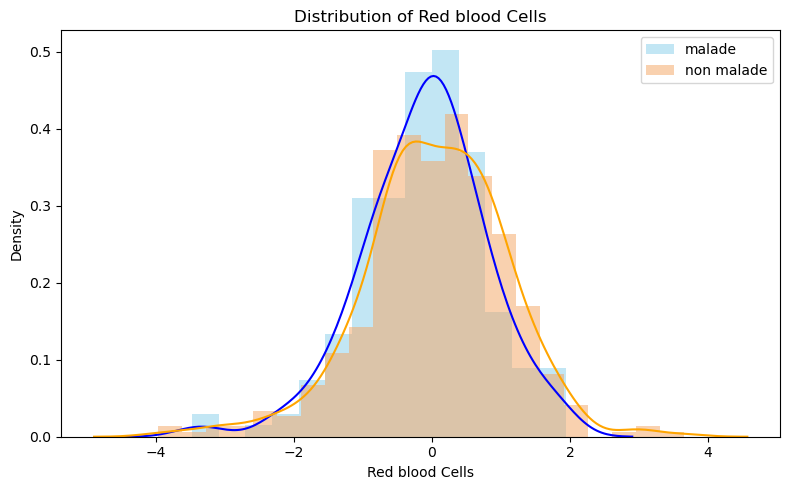

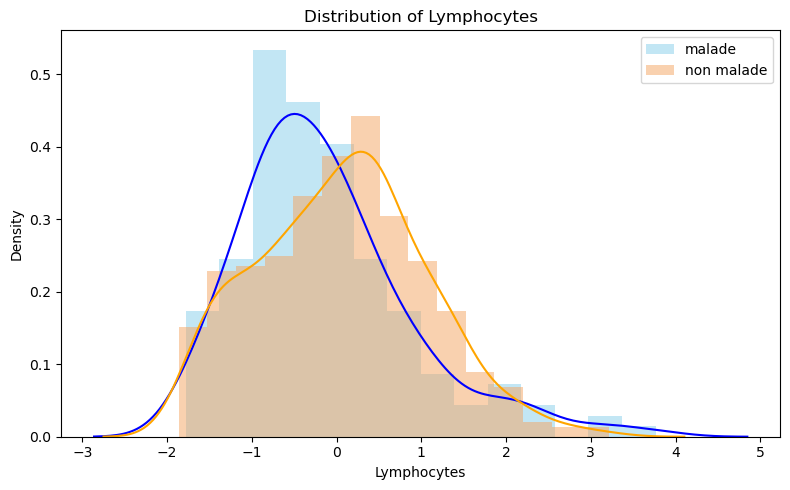

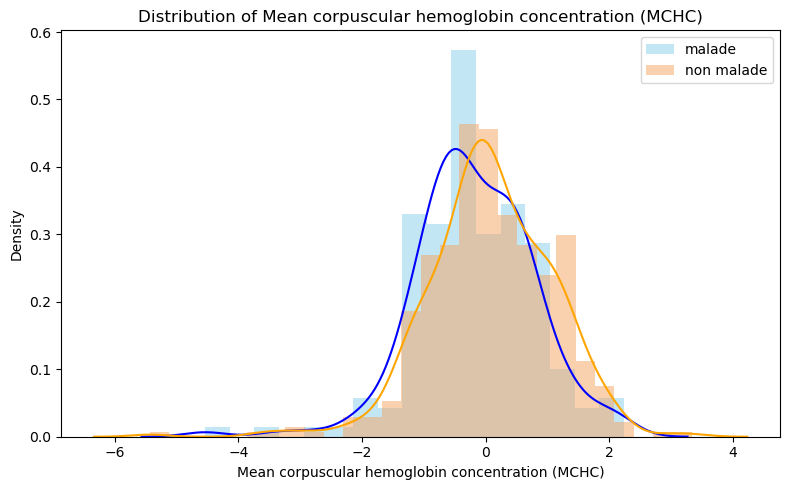

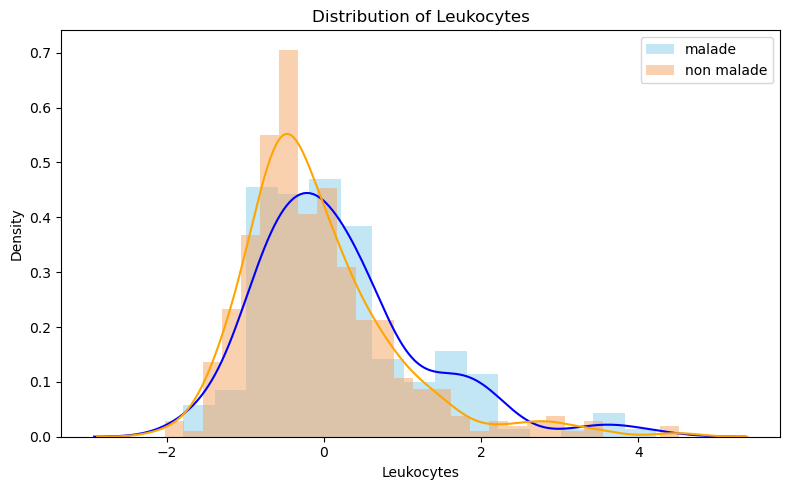

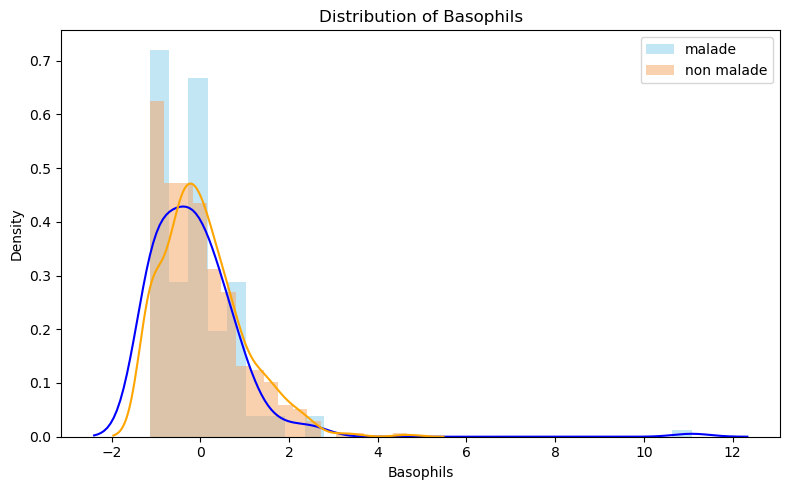

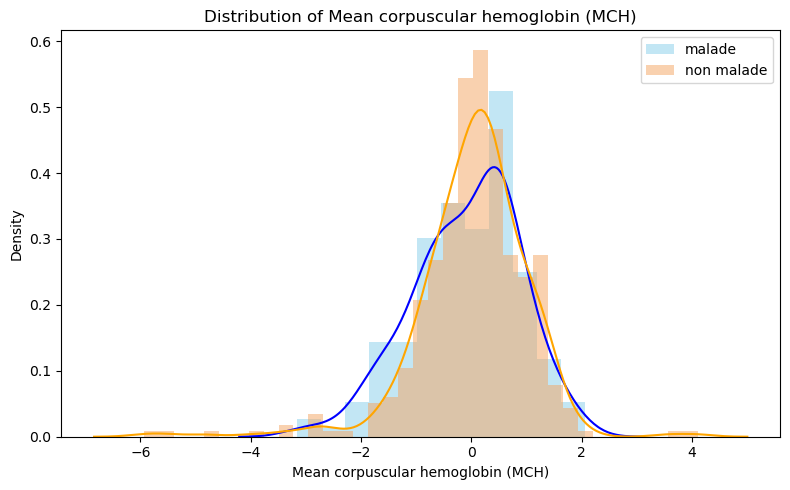

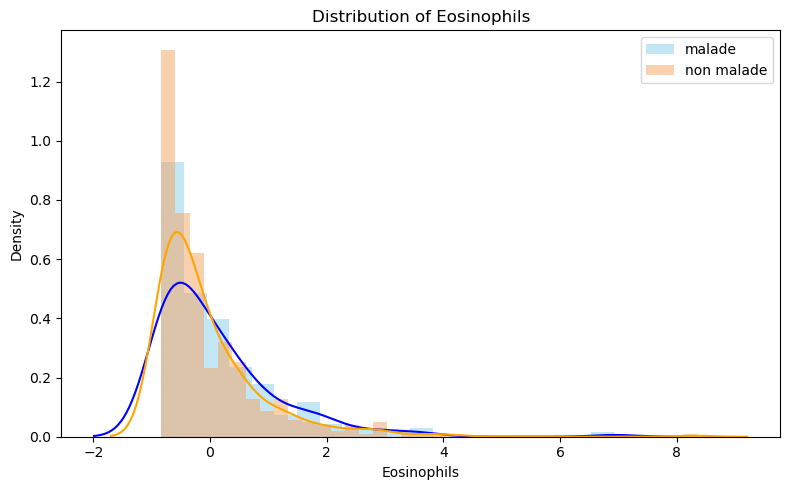

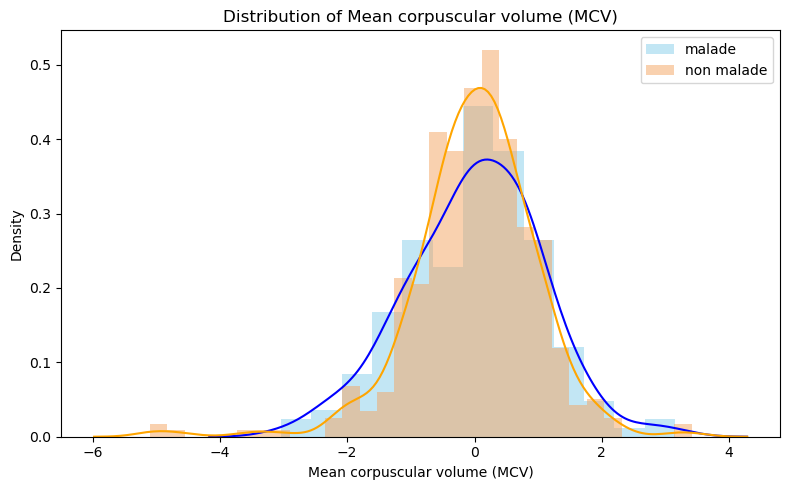

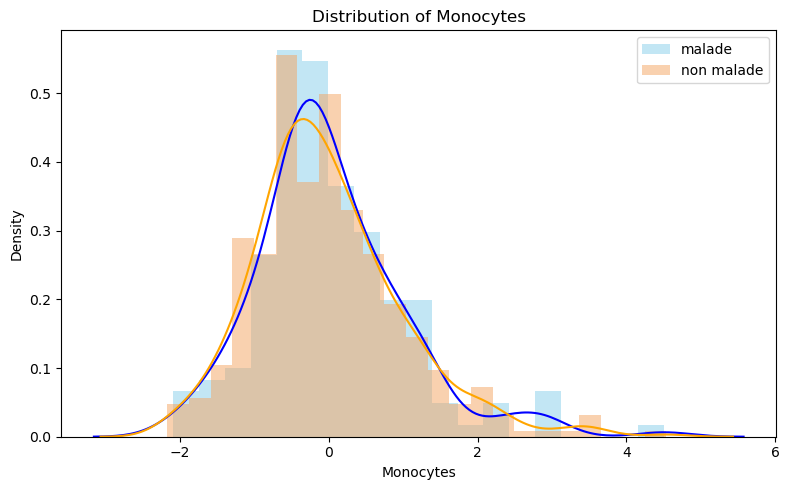

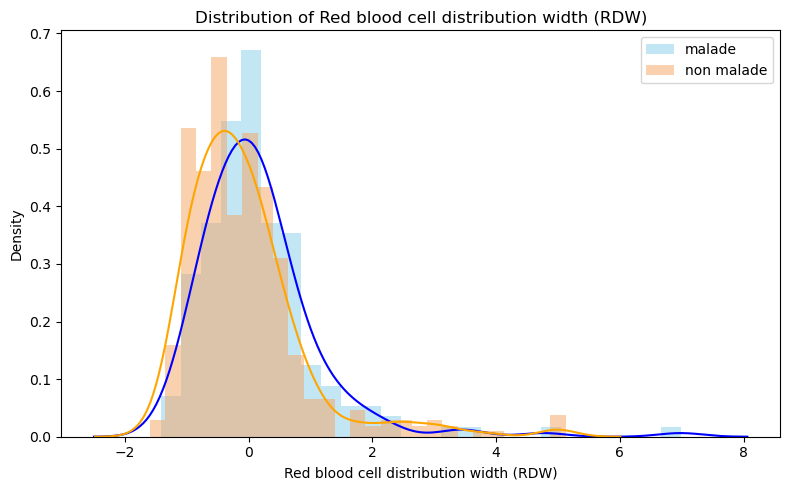

In [44]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]
for col in blood_columns:
    plt.figure(figsize=(8, 5))

    sns.histplot(data=malade_df, x=col, stat='density',color='skyblue', label='malade', alpha=0.5, edgecolor=None)
    sns.histplot(data=non_malade_df, x=col, stat='density',color='sandybrown', label='non malade', alpha=0.5, edgecolor=None)
    sns.kdeplot(data=malade_df, x=col, color='blue')
    sns.kdeplot(data=non_malade_df, x=col, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [45]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [46]:
df['statut'] = df.apply(hospitalisation,axis=1)

In [47]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

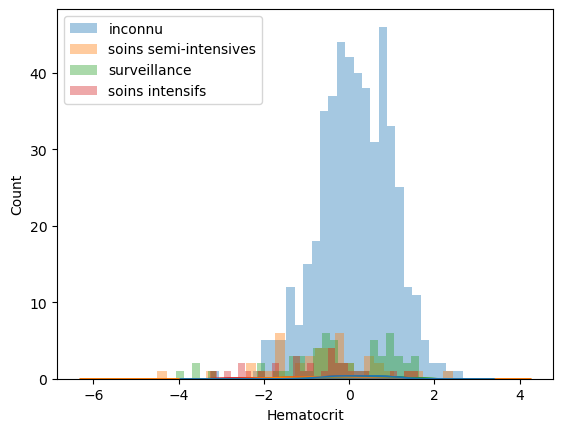

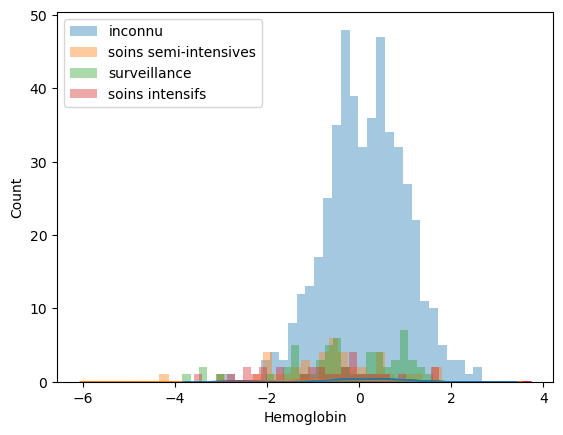

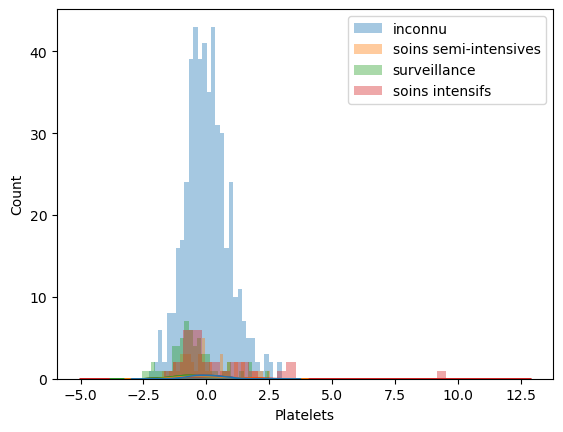

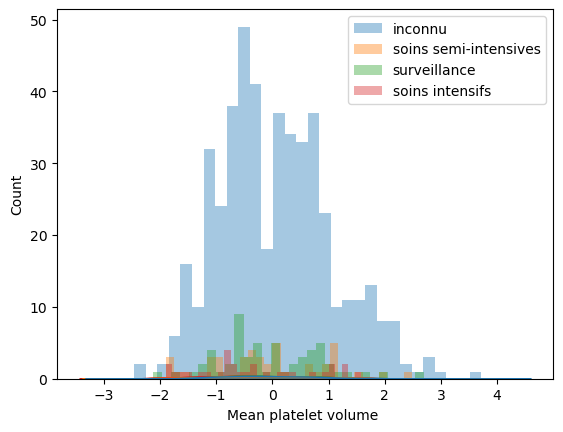

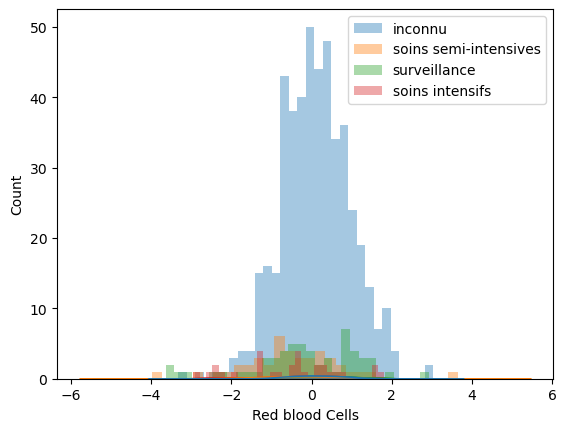

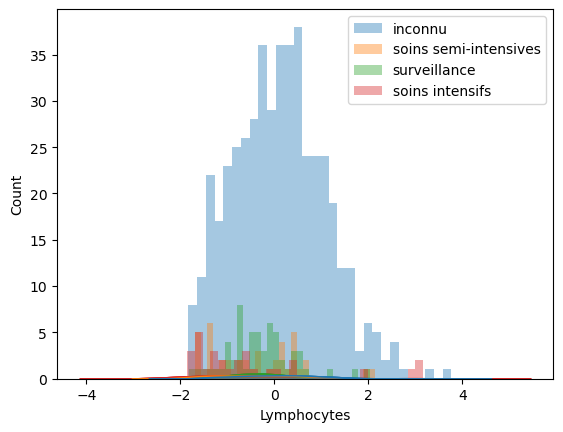

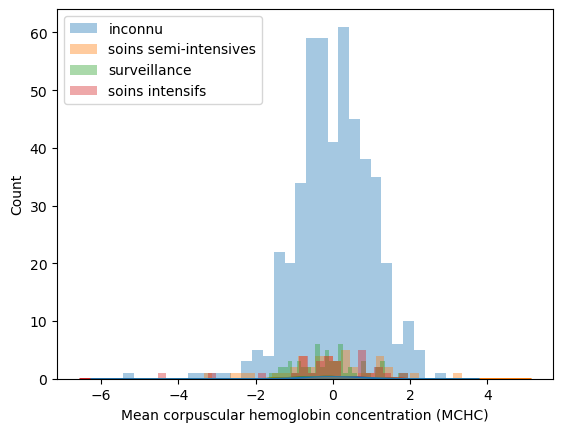

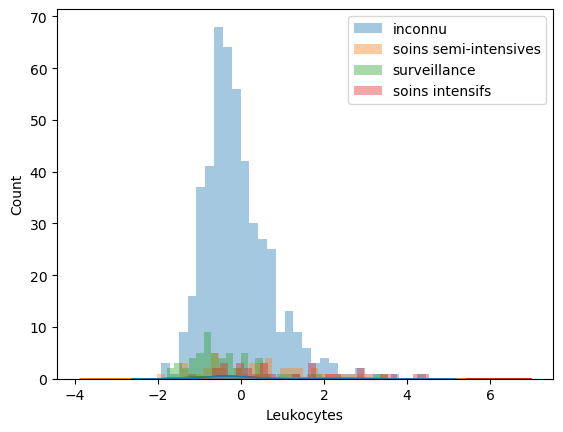

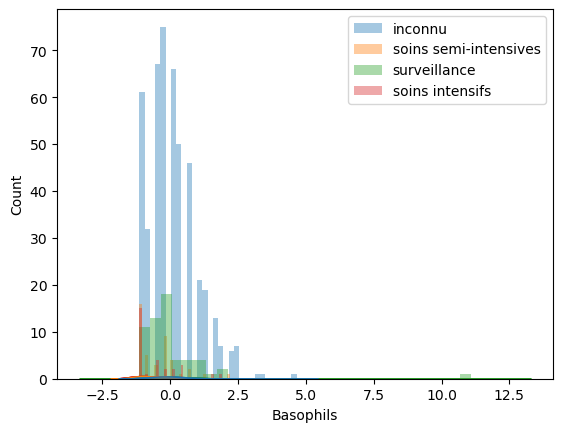

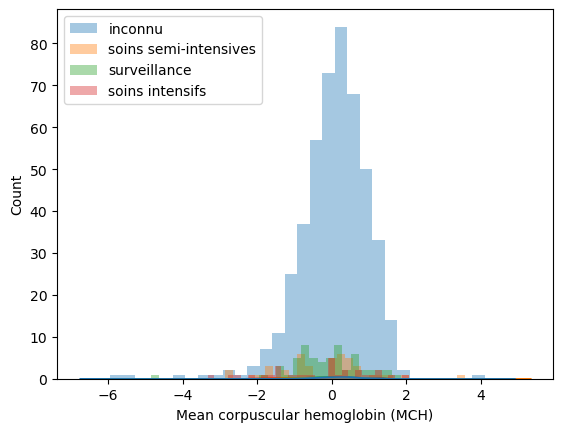

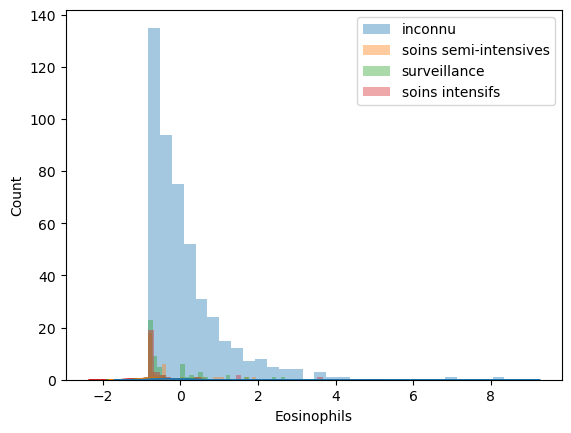

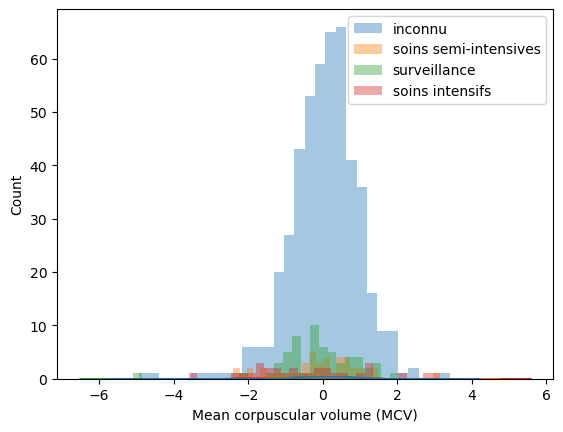

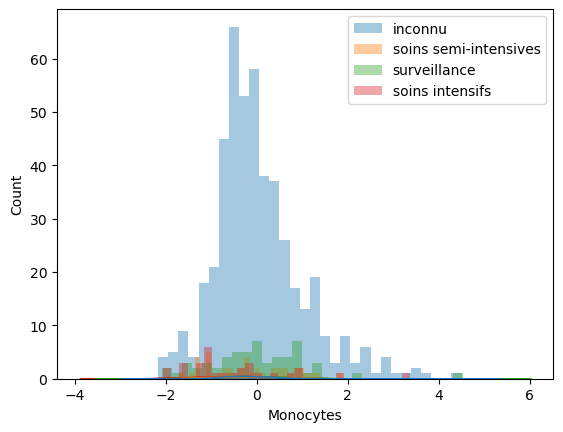

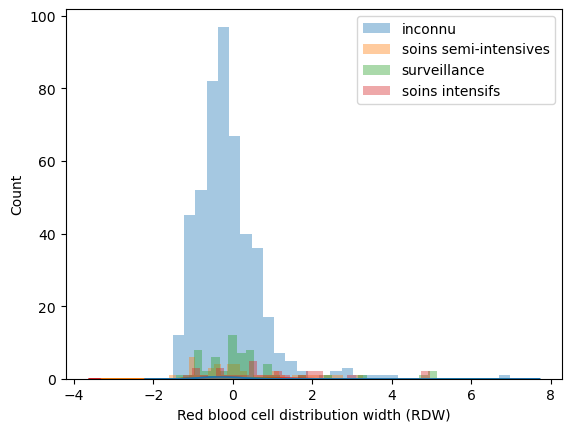

In [53]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.histplot(data=df[df['statut']==cat][col],label=cat, stat='count', bins=30, alpha=0.4, edgecolor=None)
        sns.kdeplot(data=df, x=col, hue="statut", common_norm=False, fill=True)
    plt.legend()

In [55]:
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [56]:
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [57]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [58]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [59]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [60]:
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\Omar\AppData\Local\Temp\ipykernel_18276\3520532109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


covid
negative    0.91716
positive    0.08284
Name: proportion, dtype: float64

In [61]:
df2 = df[blood_columns]
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

C:\Users\Omar\AppData\Local\Temp\ipykernel_18276\4103850288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid'] = df['SARS-Cov-2 exam result']


covid
negative    0.864548
positive    0.135452
Name: proportion, dtype: float64

### T-test ( test de student )

In [62]:
from scipy.stats import ttest_ind

In [63]:
positive_df.shape

(558, 38)

In [64]:
negative_df.shape  

(5086, 38)

In [67]:
balanced_ned = negative_df.sample(positive_df.shape[0])

In [68]:
def t_test(col):
    alpha = 0.02
    stat, p= ttest_ind(balanced_ned[col].dropna(),positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [69]:
for col in blood_columns:
    print(f'{col :-<50}{t_test(col)}')

Hematocrit----------------------------------------0
Hemoglobin----------------------------------------0
Platelets-----------------------------------------H0 Rejetée
Mean platelet volume -----------------------------H0 Rejetée
Red blood Cells-----------------------------------0
Lymphocytes---------------------------------------0
Mean corpuscular hemoglobin concentration (MCHC)--0
Leukocytes----------------------------------------H0 Rejetée
Basophils-----------------------------------------0
Mean corpuscular hemoglobin (MCH)-----------------0
Eosinophils---------------------------------------H0 Rejetée
Mean corpuscular volume (MCV)---------------------0
Monocytes-----------------------------------------H0 Rejetée
Red blood cell distribution width (RDW)-----------0
